<center>
<b><u>Predictive Models</u></b>
<br>
Final Project - Analysis
<br>
Michael Rawat
<br>
07/05/2018
</center>

<br>

<center>
Imbalanced Data Sets
<br>
<br>
Link to Video Summary: https://vimeo.com/281020514
</center>

### Contents

1) Introducing the Concept
    - Definition
    - Problem
    - Research Question
    - Methodology
    - Highlighting Approaches

2) Initial Project Steps
    - Importing Data Sets
    - Establishing Functions

3) Creating a Baseline
    - Baseline Visualization
    - Baseline Model

4) Applying Approaches
    - Visualization
    - Model
    
5) Comparison of Approaches
    - Visualizations
    - Results Table
    
6) Final Thoughts
    - Limitations
    - Further Research
    - Conclusion

### Introducing the Concept

><b>Definition</b>

> Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. In other words, the number of observations for one classification is significantly different from another classification. For example, you may have a 2-class (binary) classification problem with 100 instances (rows). A total of 80 instances are labeled with Class-1 and the remaining 20 instances are labeled with Class-2.

><b>Problem</b>

> An imbalanced data set is a problem when creating models because the accuracy score does not tell the entire story. Your model may sugggest that you have excellent accuracy (such as 90%), but the accuracy is only reflecting the underlying class distribution. The reason we get 90% accuracy on an imbalanced data (with 90% of the instances in Class-1) is because our models look at the data and decides that the best thing to do is to always predict “Class-1” and achieve high accuracy.

><b>Research Question</b>

> What are the fundamental differences between all of the current approaches to handling imbalanced data sets and when is it appropriate to use one over another?

><b>Methodology</b>

> Using five imbalanced data sets of varying distributions, each of the approaches listed below will be applied to balance the distribution. To evaluate the impact of each approach, a default decision tree model will be fit to the balanced data and compared to the original imbalanced data. Two dimensional figures, achieved by principal component analysis, will be created for each approach to loosely illustrate the concepts and for visual comparison.

### Highlighting Approaches

In [7]:
# Importing package for dataframes
import pandas as pd

######################### Summary of Approaches #########################

print('\r')
print("------------------------ Imabalanced Class Approaches ------------------------")

# Creating a list of approaches
list_of_approaches = ['Random Under-Sampling','Random Over-Sampling','Cluster Based Over-Sampling',
                      'Synthetic Minority Oversampling (SMOTE)','Adaptive Synthetic Oversampling (ADASYN)',
                      'Bagging-Based','Adaptive Boosting-Based','Gradient Tree Boosting-Based']

# Creating variables to store definitions
random_under_sampling = "This approach randomly selects samples of the majority class until the number of observations in the majority class is equal to the number of observations in the minority class, effectively removing majority class observations from the data set."
random_over_sampling = "This approach randomly selects samples of the minority class and replicates them until it the number of observations in the minority class is equal to the number of observations in the majority class."
cluster_based_over_sampling = "This approach uses the K-Means Clustering algorithm to identify clusters in the data set. All clusters then undergo oversampling to ensure that there is a balance of observations from each class within each cluster."
smote_sampling = "A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset."
modified_smote_sampling = "This method builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning."
bagging_ensemble = "Bagging is often referred to as bootstrap aggregating because it takes random samples of the training data with replacement, and creates a model on each of the sets, where each model will have individual predictions. These predictions are then aggregated/combined via the given voting process."
ada_ensemble = "Adaptive Boosting changes the sample distribution by modifying the weights attached to each of the instances. It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances. The weak learner thus focuses more on the difficult instances."
gradient_ensemble = "Gradient Boosting doesn’t modify the sample distribution. Instead of training on a newly sample distribution, the weak learner trains on the remaining errors (so-called pseudo-residuals) of the strong learner. It is another way to give more importance to the difficult instances. At each iteration, the pseudo-residuals are computed and a weak learner is fitted to these pseudo-residuals."

# Creating variables to store advantages
random_under_sampling_advantages = "Reducing the overall number of observations improves run time."
random_over_sampling_advantages = "Since no records are being discarded, there is no information loss and therefore it will typically out perform under sampling methods."
cluster_based_over_sampling_advantages = "Overcomes the challenge whereby a class is composed of different proportions of sub-clusters."
smote_sampling_advantages = "Since records are created as opposed to duplicated, overfitting is not as much of an issue. Also, since no records are being discarded, there is no loss of information."
modified_smote_sampling_advantages = "ADASYN can also autonomously shift the classifier decision boundary to be more focused on those difficult to learn examples, therefore improving learning performance."
bagging_ensemble_advantages = "Taking random samples with replacement of the data to train models reduces the chance of models being built on duplicates and attempts to create a reliable model."
ada_ensemble_advantages = "Ensemble methods typically average out bias, reduce variance and are less prone to overfitting."
gradient_ensemble_advantages = "Ensemble methods typically average out bias, reduce variance and are less prone to overfitting."

# Creating variables to store disadvantages
random_under_sampling_disadvantages = "Reducing the overall number of observations means discarding information that may be important. Furthermore, the random sample may not be representative of the entire data set which will result in inaccurate results."
random_over_sampling_disadvantages = "There is an increased chance of models overfitting the data since the minority class is simply duplicated records."
cluster_based_over_sampling_disadvantages = "Similar to over sampling methods, this is prone to models overfitting the data."
smote_sampling_disadvantages = "This method is not very effective with high dimensional data and there can be an addition of noise to the data since overlapping classes can be created."
modified_smote_sampling_disadvantages = "This method is not very effective with high dimensional data and there can be an addition of noise to the data since overlapping classes can be created."
bagging_ensemble_disadvantages = "For bagging to be successful, the minority class must contain enough records for samples to be taken that aren't identical otherwise it is simply numerous undersampled sets."
ada_ensemble_disadvantages = "Since the implementation of imbalanced learn uses random under sampling to create subsets for the majority class, you face the same issues as simply under sampling the data."
gradient_ensemble_disadvantages = "Since the implementation of imbalanced learn uses random under sampling to create subsets for the majority class, you face the same issues as simply under sampling the data."

# Storing data on approaches
approaches_data = {'Approach': list_of_approaches,
                   'Category': ['Resampling','Resampling','Resampling','Resampling','Resampling','Ensemble','Ensemble','Ensemble'],
                   'Definition': [random_under_sampling,random_over_sampling,cluster_based_over_sampling,smote_sampling,modified_smote_sampling,bagging_ensemble,ada_ensemble,gradient_ensemble],
                   'Advantages': [random_under_sampling_advantages,random_over_sampling_advantages,cluster_based_over_sampling_advantages,smote_sampling_advantages,modified_smote_sampling_advantages,bagging_ensemble_advantages,ada_ensemble_advantages,gradient_ensemble_advantages],
                   'Disadvantages': [random_under_sampling_disadvantages,random_over_sampling_disadvantages,cluster_based_over_sampling_disadvantages,smote_sampling_disadvantages,modified_smote_sampling_disadvantages,bagging_ensemble_disadvantages,ada_ensemble_disadvantages,gradient_ensemble_disadvantages]}

# Setting condition to prevent definition from being truncated due to length
pd.set_option('display.max_colwidth', -1)

# Creating data frame to hold data
Approaches_Data_Frame = pd.DataFrame(approaches_data, columns = ['Approach','Category','Definition','Advantages','Disadvantages'])

print('\r')
print("In order to determine the fundamental differences between approaches, I need to list the current appraches.")

# Displaying created data frame
print('\r')
print("Below is a table that showcases potential solutions to an imbalanced data set for comparison:")
display(Approaches_Data_Frame)


------------------------ Imabalanced Class Approaches ------------------------

In order to determine the fundamental differences between approaches, I need to list the current appraches.

Below is a table that showcases potential solutions to an imbalanced data set for comparison:


,Approach,Category,Definition,Advantages,Disadvantages
0,Random Under-Sampling,Resampling,"This approach randomly selects samples of the majority class until the number of observations in the majority class is equal to the number of observations in the minority class, effectively removing majority class observations from the data set.",Reducing the overall number of observations improves run time.,"Reducing the overall number of observations means discarding information that may be important. Furthermore, the random sample may not be representative of the entire data set which will result in inaccurate results."
1,Random Over-Sampling,Resampling,This approach randomly selects samples of the minority class and replicates them until it the number of observations in the minority class is equal to the number of observations in the majority class.,"Since no records are being discarded, there is no information loss and therefore it will typically out perform under sampling methods.",There is an increased chance of models overfitting the data since the minority class is simply duplicated records.
2,Cluster Based Over-Sampling,Resampling,This approach uses the K-Means Clustering algorithm to identify clusters in the data set. All clusters then undergo oversampling to ensure that there is a balance of observations from each class within each cluster.,Overcomes the challenge whereby a class is composed of different proportions of sub-clusters.,"Similar to over sampling methods, this is prone to models overfitting the data."
3,Synthetic Minority Oversampling (SMOTE),Resampling,A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset.,"Since records are created as opposed to duplicated, overfitting is not as much of an issue. Also, since no records are being discarded, there is no loss of information.",This method is not very effective with high dimensional data and there can be an addition of noise to the data since overlapping classes can be created.
4,Adaptive Synthetic Oversampling (ADASYN),Resampling,"This method builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning.","ADASYN can also autonomously shift the classifier decision boundary to be more focused on those difficult to learn examples, therefore improving learning performance.",This method is not very effective with high dimensional data and there can be an addition of noise to the data since overlapping classes can be created.
5,Bagging-Based,Ensemble,"Bagging is often referred to as bootstrap aggregating because it takes random samples of the training data with replacement, and creates a model on each of the sets, where each model will have individual predictions. These predictions are then aggregated/combined via the given voting process.",Taking random samples with replacement of the data to train models reduces the chance of models being built on duplicates and attempts to create a reliable model.,"For bagging to be successful, the minority class must contain enough records for samples to be taken that aren't identical otherwise it is simply numerous undersampled sets."
6,Adaptive Boosting-Based,Ensemble,Adaptive Boosting changes the sample distribution by modifying the weights attached to each of the instances. It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances. The weak learner thus focuses more on the difficult instances.,"Ensemble methods typically average out bias, reduce variance and are less prone to overfitting.","Since the implementation of imbalanced learn uses random under sampling to create subsets for the majority class, you face the same issues as simply under

### Introductory Commentary

><b>Hypothesis</b>

> Currently I have experience using the first three methods as balancing methods, and the last three three methods as models. From reading papers that have attempted to compare the performance of these approaches in a similar fashion, the majority conclude that SMOTE and various forms of it are the most effective at handling the imbalance. Their reasoning appears valid since SMOTE does not lose any information since it is not undersampling, but at the same time has less chance for overfitting since records are not duplicating.

### Importing all Packages & General

In [228]:
# Importing package to handle working directory
import os

# Importing package necessary for Data frames
import pandas as pd

# Importing package necessary for plotting
import matplotlib.pyplot as plt

# Importing package necessary for calculations
import numpy as np

# Importing package to convert a text variable into a numeric variable
from sklearn import preprocessing

# Importing package for splitting data set
from sklearn.model_selection  import train_test_split

# Importing package necessary for PCA
from sklearn.decomposition import PCA

# Importing package for creating a decision tree
from sklearn import tree

# Importing packages for metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Importing package for cross validation
from sklearn.model_selection  import cross_val_score

# Importing package necessary for Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler

# Importing package necessary for Random Over Sampling
from imblearn.over_sampling import RandomOverSampler

# Importing package necessary for Cluster Based Under Sampling
from imblearn.under_sampling import ClusterCentroids

# Importing package necessary for SMOTE (Synthetic Minority Over Sampling Technique)
from imblearn.over_sampling import SMOTE

# Importing package necessary for ADASYN (Adaptive Synthetic Sampling)
from imblearn.over_sampling import ADASYN

# Importing package necessary for Boosting Models
from imblearn.ensemble import BalanceCascade

# Importing package necessary for counting
from collections import Counter

# Importing package necessary for Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Importing package for the Bagging Classifier Model
from sklearn.ensemble import BaggingClassifier

# Importing package necessary for Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing Package to supress warnings
import warnings

# Defining pathname of working directory
pathname = "C:\\Users\\Michael's Desktop\\OneDrive - Rockhurst University\\Graduate School\\2018 - Summer\\BIA 6303 - Predictive Models\\Homework\\Final Project\\"

# Setting working directory
os.chdir(pathname)

# Setting the display width to view the entire text
pd.set_option('display.max_colwidth', 150)

# Setting condition to supress warnings
warnings.filterwarnings("ignore")

### Commentary

> After the analysis was completed, warnings were removed. The most common warning referred to metric scores of zero. This is not unusual for imbalanced data sets because often the model will predict the majority class well but compeltely fail to predict the minority class.

### Importing Data Sets

In [229]:
# Importing Churn data set
Churn = pd.read_csv(pathname + 'Datasets\\Churn_Cleaned.csv', encoding = 'utf-8')

# Importing Autism data set
Autism = pd.read_csv(pathname + 'Datasets\\Autism_Cleaned.csv', encoding = 'utf-8')

# Importing Heart Attacks data set
Heart_Attacks = pd.read_csv(pathname + 'Datasets\\Heart_Attacks_Cleaned.csv', encoding = 'utf-8')

# Importing Post Operation data set
Post_Operation = pd.read_csv(pathname + 'Datasets\\Post_Operation_Cleaned.csv', encoding = 'utf-8')

# Importing Glass Type data set
Glass_Type = pd.read_csv(pathname + 'Datasets\\Glass_Type_Cleaned.csv', encoding = 'utf-8')

# Creating a list of datasets
list_of_datasets = [Churn, Autism, Heart_Attacks, Post_Operation, Glass_Type]

# Creating a list of dataset names
list_of_dataset_names = ["Churn","Autism","Heart Attacks","Post Operation","Glass Type"]

# Creating a list of target variables
list_of_target_variables = ["No Churn","Churn","No Autism","Autism","Not High Risk","High Risk","Not Intensive Care","Intensive Care","Not Type 1","Type 1",]

### Commentary

Since the exploratory data analysis and cleaning was conducted in another notebook, below is a brief summary of each dataset being analyzed in this notebook:

> <b>Churn:</b> 

> The Churn data set was collected and cleaned by the article that prompted this project (https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/). The data set contains information on cell phone customers with the intent being to predict whether a customer will churn or not. There are 196 records across 12 variables.

> <b>Autism:</b>

> The autism data set was found on Kaggle (https://www.kaggle.com/faizunnabi/autism-screening). The data set contains medical information that may be helpful in diagnosing ASD (Autism Spectrum Disorder). After the data set was cleaned, there are 704 records across 21 variables.

> <b>Heart Attacks:</b>

> The heart attacks data set was found on Kaggle (https://www.kaggle.com/imnikhilanand/heart-attack-prediction). The data set contains medical information that may be helpful in predicting patients that are at risk of heart attacks. After the data set was cleaned, there are 261 records across 11 variables.

> <b>Post Operation:</b>

> The post operation data set was found on UCI Repository (https://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient). The data set contains basic medical information about patients currently in the recovery area of a hosptial. The goal is to use these measures to predict whether the patient needs to be placed in intensive care or not. After the data set was cleaned, there are 91 records across 8 variables.

> <b>Glass Type:</b>

> The glass type data set was found on Kaggle (https://www.kaggle.com/uciml/glass). The data set contains samples of glass described by their material composition, with the goal being to predict the glass type by its makeup. After the data set was cleaned, there are 214 records across 10 variables.

### Establishing Functions

In [230]:
# Creating a function to display a frequency chart
def frequency_chart(Dataset):
    
    # Bar Chart for Target Variable
    print('\r')
    print("The chart below shows the distribution of the target variable:")
    groupby = Dataset.groupby(Target_Variable)
    targetEDA = groupby[Target_Variable].aggregate(len)
    plt.figure()
    targetEDA.plot(kind='bar', grid=False)
    plt.axhline(0, color='k')
    plt.title("Distribution of Target Variable")
    plt.xlabel("Classification")
    plt.ylabel("Number of Records")

    # Line used to prevent plot from only displaying at the end of the block
    print('\r')
    plt.show(block=False)

    # Listing the frequency values for churn classification
    print("Below lists the numbers behind the frequency chart above:")
    print('\r')
    print(targetEDA)
    print('\r')
    
    return

# Creating a function to just save the frequency chart
def multiple_frequency_charts(Dataset,subset_name):
    
    # Bar Chart for Target Variable
    groupby = Dataset.groupby(Target_Variable)
    targetEDA = groupby[Target_Variable].aggregate(len)
    fig = plt.figure()
    targetEDA.plot(kind='bar', grid=False)
    plt.axhline(0, color='k')
    plt.title("Distribution of Target Variable")
    plt.xlabel("Classification")
    plt.ylabel("Number of Records")

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Frequency_Chart_' + str(subset_name) + '.png', bbox_inches='tight')
    
    # Prevent figure from being displayed
    plt.close(fig)
    
    return

# Creating a function to split dataset into test-train
def test_train(Dataset):
    
    # Defining variables globally to be used outside of the function
    global features_train, features_test, target_train, target_test
    
    # Breaking data set into Training Set (60%) and Test Set (40%)
    features_train, features_test, target_train, target_test = train_test_split(
        Dataset.iloc[:,1:].values, Dataset.iloc[:,0].values, test_size=0.40, random_state=0)
    
    return

# Creating a function to conduct a Decision Tree Analysis
def decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, dataset):
    
    # Defining variables globally to be used outside of the function
    global accuracy_list, f1_list, precision_list, recall_list, consistency_list
    
    # Creating a baseline Decision Tree
    decision_tree = tree.DecisionTreeClassifier()

    # Printing the Decision Tree Model to show the parameters
    print('\r')
    print("Below are the parameters for the Decision Tree Model:")
    print('\r')
    print(decision_tree)

    # Fitting the Decision Tree model to the training data
    decision_tree = decision_tree.fit(features_train, target_train)

    # Using the Decision Tree model to predict labels for the test data
    target_predicted_decision_tree = decision_tree.predict(features_test)

    # Evaluating Decision Tree model by accuracy score
    print('\r')
    decision_tree_accuracy = accuracy_score(target_test, target_predicted_decision_tree)
    print("The Decision Tree Model has an Accuracy Score of", decision_tree_accuracy)

    # Evaluating Decision Tree model by other metrics
    decision_tree_f1_score = f1_score(target_test, target_predicted_decision_tree)
    decision_tree_precision_score = precision_score(target_test, target_predicted_decision_tree)
    decision_tree_recall_score = recall_score(target_test, target_predicted_decision_tree)

    # Printing the Classification Report
    print('\r')
    print("Below is a classification report for the created Decision Tree Model:")
    print('\r')
    print(classification_report(target_test, target_predicted_decision_tree, target_names = target_name_list))

    # Displaying the confusion matrix for the decision tree
    print('\r')
    print("Below is a confusion matrix for the created Decision Tree Model:")
    print('\r')
    decision_tree_confusion_matrix = confusion_matrix(target_test, target_predicted_decision_tree)
    print(decision_tree_confusion_matrix)
    print('\r')

    if (dataset == "Churn" or dataset == "Post Operation"):
        # Cross Validating the Decision Tree Model
        decision_tree_scores = cross_val_score(decision_tree, features_train, target_train, cv=2)
        
    else:
        # Cross Validating the Decision Tree Model
        decision_tree_scores = cross_val_score(decision_tree, features_train, target_train, cv=2)
        
    # Calcuating differences from the mean
    decision_tree_max_difference = max(decision_tree_scores)-decision_tree_scores.mean()
    decision_tree_min_difference = min(decision_tree_scores)-decision_tree_scores.mean()

    # Determining if model is performing consistently
    if (decision_tree_max_difference > 0.02 or decision_tree_min_difference < -0.02):
        decision_tree_base_consistency = "Inconsistent"
    else:
         decision_tree_base_consistency = "Consistent"

    print('\r')
    print("Based on the cross validation scores distance from the mean, the model is: "+decision_tree_base_consistency)
    
    # Appending all of the results
    accuracy_list.append(decision_tree_accuracy)
    f1_list.append(decision_tree_f1_score)
    precision_list.append(decision_tree_precision_score)
    recall_list.append(decision_tree_recall_score)
    consistency_list.append(decision_tree_base_consistency)
    
    return

def bagging_analysis(features_train, target_train, features_test, target_test, target_name_list, dataset):
    
    # Defining variables globally to be used outside of the function
    global accuracy_list, f1_list, precision_list, recall_list, consistency_list
    
    # Creating a Bagging Classifier Model
    bagging = BaggingClassifier(base_estimator = tree.DecisionTreeClassifier())

    # Printing the Bagging Classifier Model to show the parameters
    print('\r')
    print("Below are the parameters for the Bagging Decision Tree Model:")
    print('\r')
    print(bagging)
    
    # Fitting the adaptive_boosting model to the training data
    bagging = bagging.fit(features_train, target_train)

    # Using the adaptive_boosting model to predict labels for the test data
    target_predicted_bagging = bagging.predict(features_test)

    # Evaluating bagging model by accuracy score
    print('\r')
    bagging_accuracy = accuracy_score(target_test, target_predicted_bagging)
    print("The Bagging Decision Tree Model has an Accuracy Score of", bagging_accuracy)

    # Evaluating bagging Decision Tree model by other metrics
    bagging_f1_score = f1_score(target_test, target_predicted_bagging)
    bagging_precision_score = precision_score(target_test, target_predicted_bagging)
    bagging_recall_score = recall_score(target_test, target_predicted_bagging)

    # Printing the Classification Report
    print('\r')
    print("Below is a classification report for the created bagging Decision Tree Model:")
    print('\r')
    print(classification_report(target_test, target_predicted_bagging, target_names = target_name_list))

    # Displaying the confusion matrix for the adaptive_boosting
    print('\r')
    print("Below is a confusion matrix for the created bagging Decision Tree Model:")
    print('\r')
    bagging_confusion_matrix = confusion_matrix(target_test, target_predicted_bagging)
    print(bagging_confusion_matrix)
    print('\r')

    if (dataset == "Churn" or dataset == "Post Operation"):
        # There are not enough samples to split
        print('\r')
        print("There are not enough samples to split and so consistency cannot be determined.")
        bagging_base_consistency = "Undetermined"
        
        # Appending result
        consistency_list.append(bagging_base_consistency)
        
    else:
        # Cross Validating the bagging Model
        bagging_scores = cross_val_score(bagging, features_train, target_train, cv=2)
        
        # Calcuating differences from the mean
        bagging_max_difference = max(bagging_scores)-bagging_scores.mean()
        bagging_min_difference = min(bagging_scores)-bagging_scores.mean()

        # Determining if model is performing consistently
        if (bagging_max_difference > 0.02 or bagging_min_difference < -0.02):
            bagging_base_consistency = "Inconsistent"
        else:
             bagging_base_consistency = "Consistent"

        print('\r')
        print("Based on the cross validation scores distance from the mean, the model is: "+bagging_base_consistency)
        
        # Appending result
        consistency_list.append(bagging_base_consistency)
    
    # Appending all of the results
    accuracy_list.append(bagging_accuracy)
    f1_list.append(bagging_f1_score)
    precision_list.append(bagging_precision_score)
    recall_list.append(bagging_recall_score)
    
    return

def adaptive_boosting_analysis(features_train, target_train, features_test, target_test, target_name_list):
    
    # Defining variables globally to be used outside of the function
    global accuracy_list, f1_list, precision_list, recall_list, consistency_list
    
    # Creating a baseline adaptive_boosting
    adaboost = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier())

    # Printing the adaptive_boosting Model to show the parameters
    print('\r')
    print("Below are the parameters for the Decision Tree Model:")
    print('\r')
    print(adaboost)

    # Fitting the adaptive_boosting model to the training data
    adaboost = adaboost.fit(features_train, target_train, sample_weight=None)

    # Using the adaptive_boosting model to predict labels for the test data
    target_predicted_adaptive_boosting = adaboost.predict(features_test)

    # Evaluating adaptive_boosting model by accuracy score
    print('\r')
    adaptive_boosting_accuracy = accuracy_score(target_test, target_predicted_adaptive_boosting)
    print("The ADA Decision Tree Model has an Accuracy Score of", adaptive_boosting_accuracy)

    # Evaluating Decision Tree model by other metrics
    adaptive_boosting_f1_score = f1_score(target_test, target_predicted_adaptive_boosting)
    adaptive_boosting_precision_score = precision_score(target_test, target_predicted_adaptive_boosting)
    adaptive_boosting_recall_score = recall_score(target_test, target_predicted_adaptive_boosting)

    # Printing the Classification Report
    print('\r')
    print("Below is a classification report for the created ADA Decision Tree Model:")
    print('\r')
    print(classification_report(target_test, target_predicted_adaptive_boosting, target_names = target_name_list))

    # Displaying the confusion matrix for the adaptive_boosting
    print('\r')
    print("Below is a confusion matrix for the created Decision Tree Model:")
    print('\r')
    adaptive_boosting_confusion_matrix = confusion_matrix(target_test, target_predicted_adaptive_boosting)
    print(adaptive_boosting_confusion_matrix)
    print('\r')

    # Cross Validating the adaptive_boosting Model
    adaptive_boosting_scores = cross_val_score(adaboost, features_train, target_train, cv=2)

    # Calcuating differences from the mean
    adaptive_boosting_max_difference = max(adaptive_boosting_scores)-adaptive_boosting_scores.mean()
    adaptive_boosting_min_difference = min(adaptive_boosting_scores)-adaptive_boosting_scores.mean()

    # Determining if model is performing consistently
    if (adaptive_boosting_max_difference > 0.02 or adaptive_boosting_min_difference < -0.02):
        adaptive_boosting_base_consistency = "Inconsistent"
    else:
         adaptive_boosting_base_consistency = "Consistent"

    print('\r')
    print("Based on the cross validation scores distance from the mean, the model is: "+adaptive_boosting_base_consistency)
    
    # Appending all of the results
    accuracy_list.append(adaptive_boosting_accuracy)
    f1_list.append(adaptive_boosting_f1_score)
    precision_list.append(adaptive_boosting_precision_score)
    recall_list.append(adaptive_boosting_recall_score)
    consistency_list.append(adaptive_boosting_base_consistency)
    
    return

def gradient_boosting_analysis(features_train, target_train, features_test, target_test, target_name_list):
    
    # Defining variables globally to be used outside of the function
    global accuracy_list, f1_list, precision_list, recall_list, consistency_list
    
    # Creating a baseline gradient_boost
    gradient_boost = GradientBoostingClassifier()

    # Printing the gradient_boost Model to show the parameters
    print('\r')
    print("Below are the parameters for the Gradient Boost Model:")
    print('\r')
    print(gradient_boost)

    # Fitting the gradient_boost model to the training data
    gradient_boost = gradient_boost.fit(features_train, target_train)

    # Using the gradient_boost model to predict labels for the test data
    target_predicted_gradient_boost = gradient_boost.predict(features_test)

    # Evaluating gradient_boost model by accuracy score
    print('\r')
    gradient_boost_accuracy = accuracy_score(target_test, target_predicted_gradient_boost)
    print("The ADA Decision Tree Model has an Accuracy Score of", gradient_boost_accuracy)

    # Evaluating gradient_boost model by other metrics
    gradient_boost_f1_score = f1_score(target_test, target_predicted_gradient_boost)
    gradient_boost_precision_score = precision_score(target_test, target_predicted_gradient_boost)
    gradient_boost_recall_score = recall_score(target_test, target_predicted_gradient_boost)

    # Printing the Classification Report
    print('\r')
    print("Below is a classification report for the created Gradient Boost Model:")
    print('\r')
    print(classification_report(target_test, target_predicted_gradient_boost, target_names = target_name_list))

    # Displaying the confusion matrix for the gradient_boost
    print('\r')
    print("Below is a confusion matrix for the created Gradient Boost Model:")
    print('\r')
    gradient_boost_confusion_matrix = confusion_matrix(target_test, target_predicted_gradient_boost)
    print(gradient_boost_confusion_matrix)
    print('\r')

    # Cross Validating the gradient_boost Model
    gradient_boost_scores = cross_val_score(gradient_boost, features_train, target_train, cv=2)

    # Calcuating differences from the mean
    gradient_boost_max_difference = max(gradient_boost_scores)-gradient_boost_scores.mean()
    gradient_boost_min_difference = min(gradient_boost_scores)-gradient_boost_scores.mean()

    # Determining if model is performing consistently
    if (gradient_boost_max_difference > 0.02 or gradient_boost_min_difference < -0.02):
        gradient_boost_base_consistency = "Inconsistent"
    else:
         gradient_boost_base_consistency = "Consistent"

    print('\r')
    print("Based on the cross validation scores distance from the mean, the model is: "+gradient_boost_base_consistency)
    
    # Appending all of the results
    accuracy_list.append(gradient_boost_accuracy)
    f1_list.append(gradient_boost_f1_score)
    precision_list.append(gradient_boost_precision_score)
    recall_list.append(gradient_boost_recall_score)
    consistency_list.append(gradient_boost_base_consistency)
    
    return

### Functions Commentary

One of the main reasons functions are used in this notebook is to cut down on the number of repeated lines that are present. This helps to prevent results from being 'lost' in all of the code. There are still areas of redundancy in this document that can be automated, but the functions below along with for loops have cut down on the number of lines significantly.

> <b>Frequency Chart Function:</b> 

> This function will take the target variable of a dataset, group the classes, sum the instances of each class, and present it in a bar chart form. Note that for this project all datasets contain a binary class target as opposed to a multi-class target. The main purpose of using this function is to demonstrate that after each sampling/ensemble method, the classes are balanced.

> <b>Multiple Frequency Charts Function:</b>

> In the instances whereby numerous subsets of the data is taken (Adaboost and Gradient), to prevent a lot of frequency charts from being displayed, the charts will be saved and displayed in a more compact manner.

> <b>Test-Train Function:</b>

> To ensure that training and test sets are created the same way, this function will take the input dataset and split it into four sets. The Target train and Features train are made up of 60% of the dataset, and the remaining 40% makes up the Target test and Features test. The Target sets only contain the target variable (the classification labels), whereas the Features sets contain all of the predictor variables.

> <b>Decision Tree Analysis Function:</b>

> This function feeds the created training and test sets into a default decision tree for analysis. In this function the training data is fitted to the decision tree model which can then be used to predict classifications of records in the test set. As a result, metrics such as accuracy, precision, recall, f1 score, and consistency via cross validation can be calculated and stored for comparison.

> <b>Bagging, Adaptive Boosting and Gradient Boosting Analysis:</b>

> These functions carry out the same processes as the decision tree analysis, with the main difference being the model the training data is fitted to. For each of these models, the baseline estimator has been set to a decision tree to allow results remain comparable with the rest of the methods.

### Baseline



------------------------ Baseline Churn Data ------------------------

Below is a two dimensional representation of the data set:



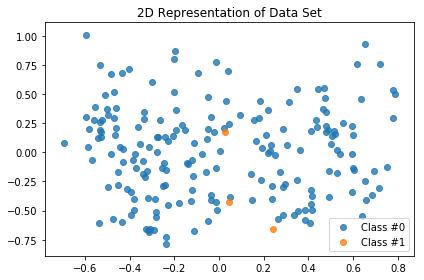


The chart below shows the distribution of the target variable:



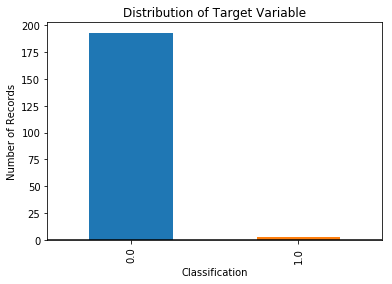

Below lists the numbers behind the frequency chart above:

Churn Flag
0.0    193.0
1.0      3.0
Name: Churn Flag, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.962025316456

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       0.99      0.97      0.98        78
      Churn       0.00      0.00      0.00         1

avg / total       0.97      0.96      0.97        79


Below is a confusion matrix for the created Decision Tree Model:

[[76  2]
 [ 1  0]]


Based on the cross valid

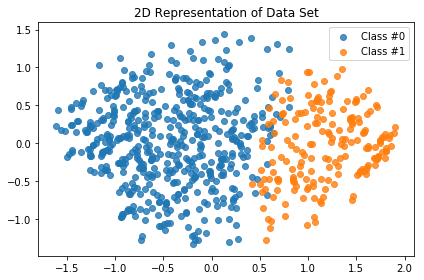


The chart below shows the distribution of the target variable:



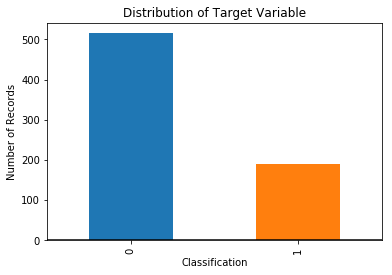

Below lists the numbers behind the frequency chart above:

Class/ASD
0    515
1    189
Name: Class/ASD, dtype: int64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00       210
     Autism       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00       282


Below is a confusion matrix for the created Decision Tree Model:

[[210   0]
 [  0  72]]


Based on the cross validation scores distan

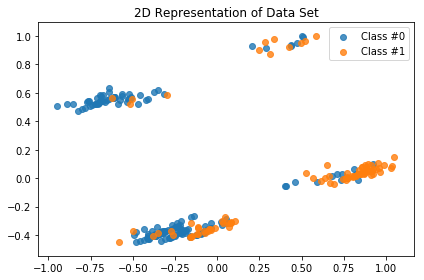


The chart below shows the distribution of the target variable:



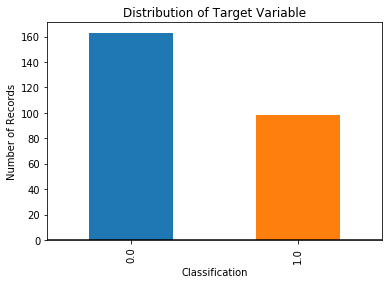

Below lists the numbers behind the frequency chart above:

num
0.0    163.0
1.0     98.0
Name: num, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.695238095238

Below is a classification report for the created Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.79      0.74      0.76        70
    High Risk       0.54      0.60      0.57        35

  avg / total       0.70      0.70      0.70       105


Below is a confusion matrix for the created Decision Tree Model:

[[52 18]
 [14 21]]


Based on the cross validation 

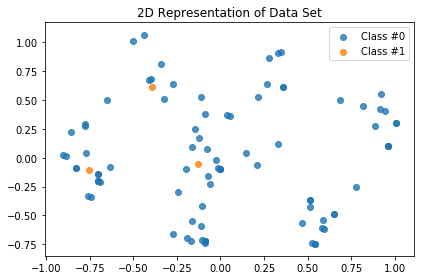


The chart below shows the distribution of the target variable:



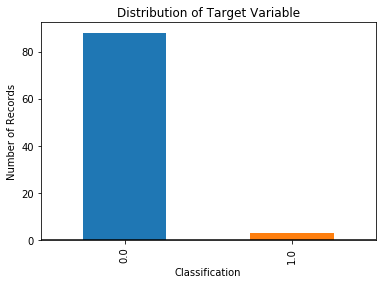

Below lists the numbers behind the frequency chart above:

Intensive_Care
0.0    88.0
1.0     3.0
Name: Intensive_Care, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.972972972973

Below is a classification report for the created Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       1.00      0.97      0.99        36
    Intensive Care       0.50      1.00      0.67         1

       avg / total       0.99      0.97      0.98        37


Below is a confusion matrix for the created Decision Tree Model:

[[35  1]
 [

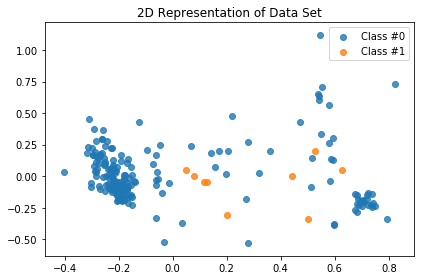


The chart below shows the distribution of the target variable:



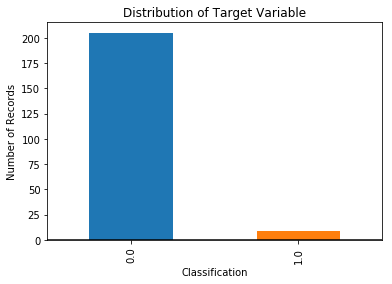

Below lists the numbers behind the frequency chart above:

Target_Type
0.0    205.0
1.0      9.0
Name: Target_Type, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.96511627907

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       1.00      0.96      0.98        83
     Type 1       0.50      1.00      0.67         3

avg / total       0.98      0.97      0.97        86


Below is a confusion matrix for the created Decision Tree Model:

[[80  3]
 [ 0  3]]


Based on the cross vali

,Data Set,Method,Accuracy,Precision,Recall,F1 Score,Consistency
0,Churn,Baseline,0.962025,0.000000,0.0,0.000000,Consistent
1,Autism,Baseline,1.000000,1.000000,1.0,1.000000,Consistent
2,Heart Attacks,Baseline,0.695238,0.538462,0.6,0.567568,Inconsistent
3,Post Operation,Baseline,0.972973,0.500000,1.0,0.666667,Consistent
4,Glass Type,Baseline,0.965116,0.500000,1.0,0.666667,Consistent


In [247]:
# Creating a dummy values
dataset_value = 0
save_value = 1
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Baseline " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Creating 2D Visual using PCA #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    idx_class_0 = target_variable_array == 0
    plt.scatter(X_vis[idx_class_0, 0], X_vis[idx_class_0, 1], alpha=.8, label='Class #0')
    plt.scatter(X_vis[~idx_class_0, 0], X_vis[~idx_class_0, 1], alpha=.8, label='Class #1')

    # Further Plot Formatting
    plt.title('2D Representation of Data Set')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Baseline_' + str(save_value) + '.png', bbox_inches='tight')

    # Display the plot
    print('\r')
    print("Below is a two dimensional representation of the data set:")
    print('\r')
    plt.show()

    ######################### Utilizing Functions #########################

    # Displaying a frequency chart
    frequency_chart(dataset)

    # Splitting the data into a test and training set
    test_train(dataset)
    
    # Conducting decision tree analysis
    decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])
    
    # Storing metrics from decision tree
    baseline_accuracy = accuracy_list
    baseline_f1 = f1_list
    baseline_precision = precision_list
    baseline_recall = recall_list
    baseline_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2
    
######################### Displaying Results Table #########################

print('\r')
print('\r')
print("------------------------ Baseline Results ------------------------")

# Storing all baseline
baseline_analysis = [[list_of_dataset_names[0],'Baseline',baseline_accuracy[0],baseline_precision[0],baseline_recall[0],baseline_f1[0],baseline_consistency[0]],
                 [list_of_dataset_names[1],'Baseline',baseline_accuracy[1],baseline_precision[1],baseline_recall[1],baseline_f1[1],baseline_consistency[1]],
                 [list_of_dataset_names[2],'Baseline',baseline_accuracy[2],baseline_precision[2],baseline_recall[2],baseline_f1[2],baseline_consistency[2]],
                 [list_of_dataset_names[3],'Baseline',baseline_accuracy[3],baseline_precision[3],baseline_recall[3],baseline_f1[3],baseline_consistency[3]],
                 [list_of_dataset_names[4],'Baseline',baseline_accuracy[4],baseline_precision[4],baseline_recall[4],baseline_f1[4],baseline_consistency[4]]]

# Creating data frame to hold data
Baseline_Analysis_Data_Frame = pd.DataFrame(baseline_analysis,columns=['Data Set','Method','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
print('\r')
print("Below is a table showing the results for each dataset:")
display(Baseline_Analysis_Data_Frame)

### Baseline Commentary

The purpose of this baseline analysis is to provide confirmation that all of the datasets are indeed imbalanced, and to also provide a visual (provided by conducting principal component analysis) as to what the data set looks like before the sampling/ensemble methods.

> <b>Churn Data Set Baseline:</b>

> The frequency chart shows that the dataset is made up of 98.5% records for Class 0, and only 1.5% records for Class 1 which is a significant imbalance. When looking at the decision tree, it is clear that this model is only able to predict the majority class given its precision score of 0.99 and a minority class score of 0.


> <b>Autism Data Set Baseline:</b>

> The frequency chart shows that the dataset is made up of 73.2% records for Class 0, and only 26.8% records for Class 1 which is a clear imbalance but not as extreme as other datasets. This model perfectly predicts both classes which makes me suspicious of overfitting.

> <b>Heart Attacks Data Set Baseline:</b>

> The frequency chart shows that the dataset is made up of 62.5% records for Class 0, and only 37.5% records for Class 1 which is imbalanced but the best balanced dataset being analyzed. By looking at the decision tree, its actually predicting both classes, just poorly, therefore it will be interesting to see if sampling/ensemble methods have any effect.

> <b>Post Operation Data Set Baseline:</b>

> The frequency chart shows that the dataset is made up of 96.7% records for Class 0, and only 3.3% records for Class 1 which is a significant imbalance. When looking at the decision tree, it is clear that this model is only able to predict the majority class given its precision score of 1.0 and a much lower minority score.

> <b>Glass Type Data Set Baseline:</b>

> The frequency chart shows that the dataset is made up of 95.8% records for Class 0, and only 4.2% records for Class 1 which is a significant imbalance. When looking at the decision tree, it is clear that this model is only able to predict the majority class given its precision score of 1.0 and a much lower minority score.

Since these are the baseline results, they will be used as a comparison against each method conducted.

### Random Undersampling



------------------------ Random Under Sampling of Churn Data ------------------------

Below is a chart that displays the impact of random undersampling:



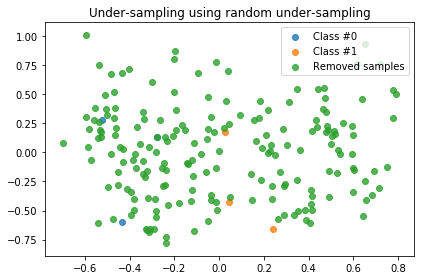


The chart below shows the distribution of the target variable:



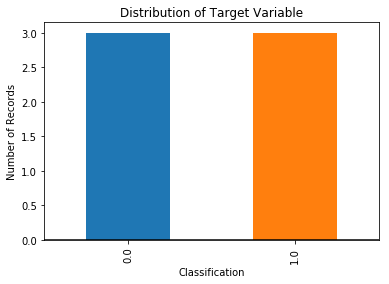

Below lists the numbers behind the frequency chart above:

Churn Flag
0.0    3.0
1.0    3.0
Name: Churn Flag, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.666666666667

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       1.00      0.50      0.67         2
      Churn       0.50      1.00      0.67         1

avg / total       0.83      0.67      0.67         3


Below is a confusion matrix for the created Decision Tree Model:

[[1 1]
 [0 1]]


Based on the cross validation sc

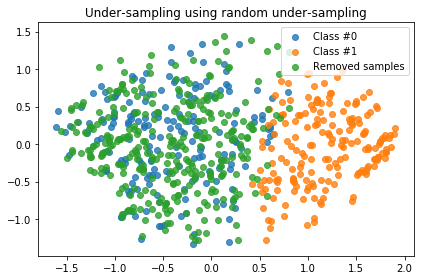


The chart below shows the distribution of the target variable:



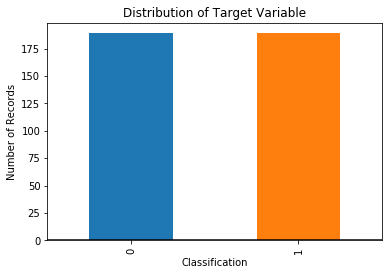

Below lists the numbers behind the frequency chart above:

Class/ASD
0    189
1    189
Name: Class/ASD, dtype: int64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00        75
     Autism       1.00      1.00      1.00        77

avg / total       1.00      1.00      1.00       152


Below is a confusion matrix for the created Decision Tree Model:

[[75  0]
 [ 0 77]]


Based on the cross validation scores distance f

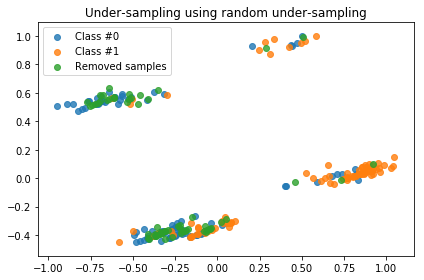


The chart below shows the distribution of the target variable:



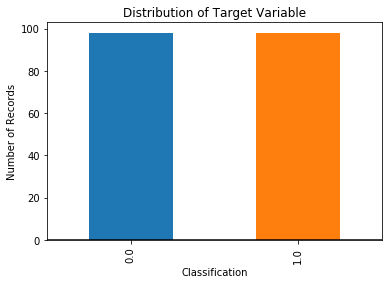

Below lists the numbers behind the frequency chart above:

num
0.0    98.0
1.0    98.0
Name: num, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.683544303797

Below is a classification report for the created Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.67      0.68      0.68        38
    High Risk       0.70      0.68      0.69        41

  avg / total       0.68      0.68      0.68        79


Below is a confusion matrix for the created Decision Tree Model:

[[26 12]
 [13 28]]


Based on the cross validation sc

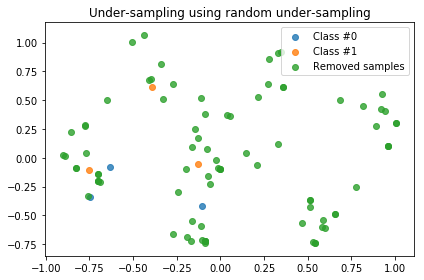


The chart below shows the distribution of the target variable:



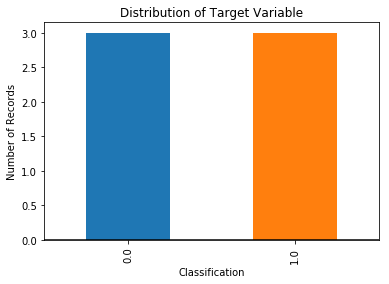

Below lists the numbers behind the frequency chart above:

Intensive_Care
0.0    3.0
1.0    3.0
Name: Intensive_Care, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.666666666667

Below is a classification report for the created Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       1.00      0.50      0.67         2
    Intensive Care       0.50      1.00      0.67         1

       avg / total       0.83      0.67      0.67         3


Below is a confusion matrix for the created Decision Tree Model:

[[1 1]
 [0 1]

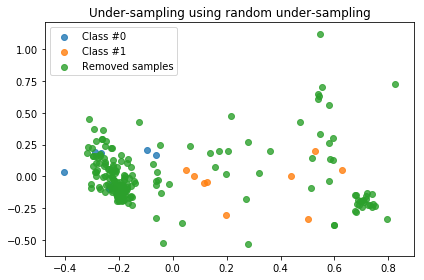


The chart below shows the distribution of the target variable:



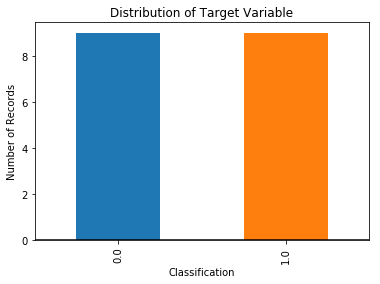

Below lists the numbers behind the frequency chart above:

Target_Type
0.0    9.0
1.0    9.0
Name: Target_Type, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       1.00      1.00      1.00         5
     Type 1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         8


Below is a confusion matrix for the created Decision Tree Model:

[[5 0]
 [0 3]]


Based on the cross validation scores dist

,Data Set,Method,Accuracy,Precision,Recall,F1 Score,Consistency
0,Churn,Random Under Sampling,0.666667,0.5,1.000000,0.666667,Inconsistent
1,Autism,Random Under Sampling,1.000000,1.0,1.000000,1.000000,Consistent
2,Heart Attacks,Random Under Sampling,0.683544,0.7,0.682927,0.691358,Inconsistent
3,Post Operation,Random Under Sampling,0.666667,0.5,1.000000,0.666667,Inconsistent
4,Glass Type,Random Under Sampling,1.000000,1.0,1.000000,1.000000,Inconsistent


In [249]:
# Creating a dummy values
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Random Under Sampling of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)
    
    ######################### Conducting Random Undersampling #########################

    # Defining Random Under Sampler Function
    random_under_sampler = RandomUnderSampler(return_indices=True)

    # Applying Random Under Sampler Function
    X_resampled, y_resampled, idx_resampled = random_under_sampler.fit_sample(predictor_variables_array, target_variable_array)

    # Conducting PCA on Random Under Sampled Data
    X_res_vis = pca.transform(X_resampled)

    # Storing the observations that were not sampled by calculating the difference
    idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),idx_resampled)

    # Creating a new data frame
    Dataset_Under_Sampled = dataset.loc[idx_resampled]

    ######################### Creating Plot #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    idx_class_0 = y_resampled == 0
    plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1], alpha=.8, label='Class #0')
    plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1], alpha=.8, label='Class #1')
    plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1], alpha=.8, label='Removed samples')

    # Further Plot Formatting
    plt.title('Under-sampling using random under-sampling')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Random_Under_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of random undersampling:")
    print('\r')
    plt.show()

    ######################### Utilizing Functions #########################

    # Displaying a frequency chart
    frequency_chart(Dataset_Under_Sampled)

    # Splitting the data into a test and training set
    test_train(Dataset_Under_Sampled)
    
    # Conducting decision tree analysis
    decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])
    
    # Storing metrics from decision tree
    random_under_accuracy = accuracy_list
    random_under_f1 = f1_list
    random_under_precision = precision_list
    random_under_recall = recall_list
    random_under_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2
    
    
######################### Displaying Results Table #########################

print('\r')
print('\r')
print("------------------------ Random Under Sampling Results ------------------------")

# Storing all baseline
random_under_sampling_analysis = [[list_of_dataset_names[0],'Random Under Sampling',random_under_accuracy[0],random_under_precision[0],random_under_recall[0],random_under_f1[0],random_under_consistency[0]],
                                 [list_of_dataset_names[1],'Random Under Sampling',random_under_accuracy[1],random_under_precision[1],random_under_recall[1],random_under_f1[1],random_under_consistency[1]],
                                 [list_of_dataset_names[2],'Random Under Sampling',random_under_accuracy[2],random_under_precision[2],random_under_recall[2],random_under_f1[2],random_under_consistency[2]],
                                 [list_of_dataset_names[3],'Random Under Sampling',random_under_accuracy[3],random_under_precision[3],random_under_recall[3],random_under_f1[3],random_under_consistency[3]],
                                 [list_of_dataset_names[4],'Random Under Sampling',random_under_accuracy[4],random_under_precision[4],random_under_recall[4],random_under_f1[4],random_under_consistency[4]]]

# Creating data frame to hold data
Random_Under_Sampling_Analysis_Data_Frame = pd.DataFrame(random_under_sampling_analysis,columns=['Data Set','Method','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
print('\r')
print("Below is a table showing the results for each dataset:")
display(Random_Under_Sampling_Analysis_Data_Frame)

### Random Under Sampling Commentary

As defined earlier, random under sampling reduces the size of the majority class down to the size of the minority class through removing records.

> <b>Churn Data Set:</b>

> After random under sampling, the Churn data set contains 3 records for each class that can be split into test and training sets. In this instance the metrics lose all value because there aren't enough records to build a reliable model as indicated by the model being inconsistent. This is a clear limitation of under sampling when the minority class is below 50 records.

> <b>Autism Data Set:</b>

> After random under sampling, the autism data set contains 189 records for each class that can be split into test and training sets. The model gets a perfect score, being able to predict both classes perfectly. This may be an idication of overfitting, however, looking at the two dimensional figure, the records do appear to be linearly separable and thus easier to predict.

> <b>Heart Attacks Data Set:</b>

> After random under sampling, the heart attacks data set contains 98 records for each class that can be split into test and training sets. The decision tree model performs with a 68% accuracy which is realistic from a limited dataset and default model. One thing to notice is that the under sampling doesn't take into account the apparent clusters that are visible in a two dimensional perspective which may help the models performance.

> <b>Post Operation Data Set:</b>

> After random under sampling, the post operation data set contains 3 records for each class that can be split into test and training sets. In this instance the metrics lose all value because there aren't enough records to build a reliable model as indicated by the model being inconsistent. This is a clear limitation of under sampling when the minority class is below 50 records.

> <b>Glass Type Data Set:</b>

> After random under sampling, the glass type data set contains 9 records for each class that can be split into test and training sets. In this instance the metrics lose all value because there aren't enough records to build a reliable model as indicated by the model being inconsistent. This is a clear limitation of under sampling when the minority class is below 50 records.

The clear limitation of under sampling an imbalanced data set is apparent when the number of records in the minority set is too small to build a reliable model. For imbalanced data sets with the minority set less than 50 records, under sampling means that the entire data set is now less than 100 records which means a significant loss in valuable information for most cases, and although the random element helps reduce experimenter bias, it may mean that unrepresentative samples are chosen.

### Random Oversampling



------------------------ Random Over Sampling of Churn Data ------------------------

Below is a chart that displays the impact of random oversampling:



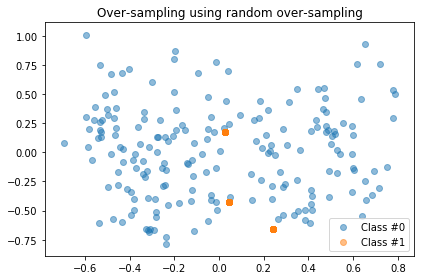


The chart below shows the distribution of the target variable:



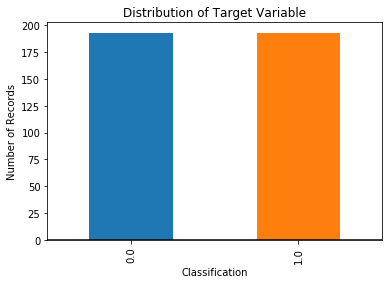

Below lists the numbers behind the frequency chart above:

Churn Flag
0.0    193.0
1.0    193.0
Name: Churn Flag, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       1.00      1.00      1.00        76
      Churn       1.00      1.00      1.00        79

avg / total       1.00      1.00      1.00       155


Below is a confusion matrix for the created Decision Tree Model:

[[76  0]
 [ 0 79]]


Based on the cross validation score

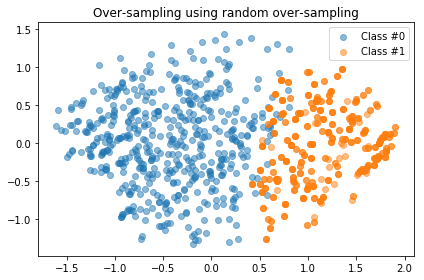


The chart below shows the distribution of the target variable:



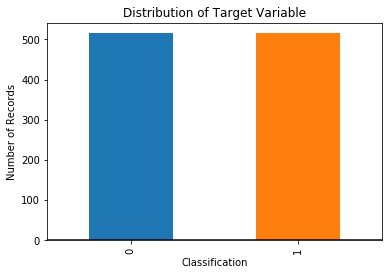

Below lists the numbers behind the frequency chart above:

Class/ASD
0    515
1    515
Name: Class/ASD, dtype: int64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00       204
     Autism       1.00      1.00      1.00       208

avg / total       1.00      1.00      1.00       412


Below is a confusion matrix for the created Decision Tree Model:

[[204   0]
 [  0 208]]


Based on the cross validation scores distan

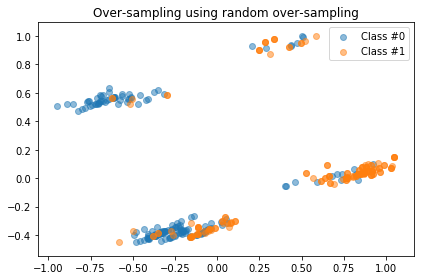


The chart below shows the distribution of the target variable:



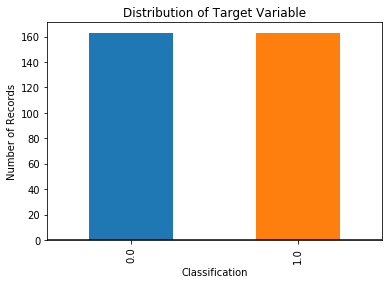

Below lists the numbers behind the frequency chart above:

num
0.0    163.0
1.0    163.0
Name: num, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.832061068702

Below is a classification report for the created Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.86      0.81      0.83        68
    High Risk       0.81      0.86      0.83        63

  avg / total       0.83      0.83      0.83       131


Below is a confusion matrix for the created Decision Tree Model:

[[55 13]
 [ 9 54]]


Based on the cross validation 

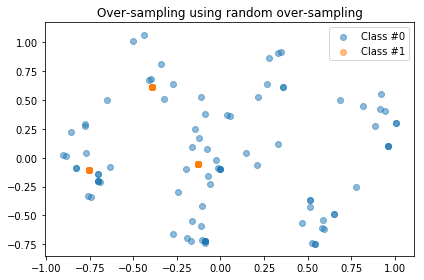


The chart below shows the distribution of the target variable:



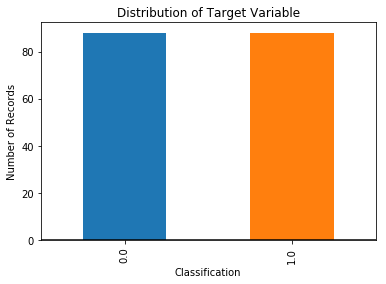

Below lists the numbers behind the frequency chart above:

Intensive_Care
0.0    88.0
1.0    88.0
Name: Intensive_Care, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.971830985915

Below is a classification report for the created Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       1.00      0.94      0.97        33
    Intensive Care       0.95      1.00      0.97        38

       avg / total       0.97      0.97      0.97        71


Below is a confusion matrix for the created Decision Tree Model:

[[31  2]
 [

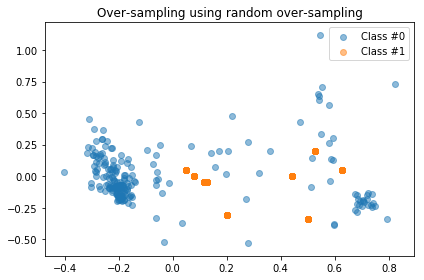


The chart below shows the distribution of the target variable:



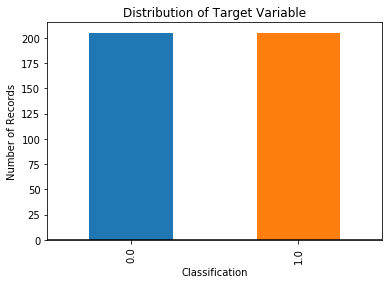

Below lists the numbers behind the frequency chart above:

Target_Type
0.0    205.0
1.0    205.0
Name: Target_Type, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       1.00      1.00      1.00        84
     Type 1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       164


Below is a confusion matrix for the created Decision Tree Model:

[[84  0]
 [ 0 80]]


Based on the cross validation sco

In [233]:
# Creating a dummy value
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Random Over Sampling of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Conducting Random Oversampling #########################

    # Defining Random Over Sampler Function
    random_over_sampler = RandomOverSampler()

    # Applying Random Over Sampler Function
    X_resampled, y_resampled = random_over_sampler.fit_sample(predictor_variables_array, target_variable_array)

    # Conducting PCA on Random Over Sampled Data
    X_res_vis = pca.transform(X_resampled)

    # Creating a new data frame for predictors
    Dataset_Over_Sampled_Predictors = pd.DataFrame(X_resampled)
    Dataset_Over_Sampled_Predictors.columns = predictor_variables_columns.columns.tolist()

    # Creating a new data frame for the target
    Dataset_Over_Sampled_Target = pd.DataFrame({Target_Variable:y_resampled})

    # Creating a new data frame combining target and predictors
    #Dataset_Over_Sampled = pd.concat([Dataset_Over_Sampled_Target, Dataset_Over_Sampled_Predictors], axis=1, sort=False)
    Dataset_Over_Sampled = pd.concat([Dataset_Over_Sampled_Target, Dataset_Over_Sampled_Predictors], axis=1)

    ######################### Creating Plot #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], alpha=.5, label='Class #0')
    plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], alpha=.5, label='Class #1')

    # Further Plot Formatting
    plt.title('Over-sampling using random over-sampling')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Random_Over_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of random oversampling:")
    print('\r')
    plt.show()

    ######################### Utilizing Functions #########################

    # Displaying a frequency chart
    frequency_chart(Dataset_Over_Sampled)

    # Splitting the data into a test and training set
    test_train(Dataset_Over_Sampled)
    
    # Conducting decision tree analysis
    decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])
    
    # Storing metrics from decision tree
    random_over_accuracy = accuracy_list
    random_over_f1 = f1_list
    random_over_precision = precision_list
    random_over_recall = recall_list
    random_over_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2

### Random Over Sampling Commentary

As defined earlier, random over sampling increases the size of the minority class up to the size of the majority class through sampling with replacement, or simply put duplicating records.

> <b>Churn Data Set:</b>

> After random over sampling, the Churn data set contains 193 records for each class that can be split into test and training sets. This model predicts both classes perfectly which is not surprising since the minority class is merely duplicated. In other words, all possible minorty records are most likely present both in the training and test set so there is no real prediction, only recognition.

> <b>Autism Data Set:</b>

> After random over sampling, the Autism data set contains 515 records for each class that can be split into test and training sets. This model predicts both classes perfectly which is not surprising since the minority class is merely duplicated. In other words, all possible minorty records are most likely present both in the training and test set so there is no real prediction, only recognition.

> <b>Heart Attacks Data Set:</b>

> After random over sampling, the heart attacks data set contains 163 records for each class that can be split into test and training sets. The decision tree model has an accuracy of 83% which is an indication that the model has predicted classes incorectly even though the minority sample is simply duplications. In the two dimensional space you can see its hard to distinguish between the two classes.

> <b>Post Operation Data Set:</b>

> After random over sampling, the post operation data set contains 88 records for each class that can be split into test and training sets. This model pretty much predicts both classes perfectly which is not surprising since the minority class is merely duplicated. In other words, all possible minorty records are most likely present both in the training and test set so there is no real prediction, only recognition.

> <b>Glass Type Data Set:</b>

> After random over sampling, the glass type data set contains 205 records for each class that can be split into test and training sets. This model pretty much predicts both classes perfectly which is not surprising since the minority class is merely duplicated. In other words, all possible minorty records are most likely present both in the training and test set so there is no real prediction, only recognition.

As you can see from the comments above, all of the oversampled data sets suffered from overfitting due to the method simply duplicating records and allowing models to simply classify records based on recognition as opposed to prediction. This means that the true implementation of these models will be unpredictable because we have not been able to expose the models to unseen records. This is a huge limitation.

### Cluster Based Undersampling



------------------------ Cluster Based Under Sampling of Churn Data ------------------------

Below is a chart that displays the impact of cluster based under sampling:



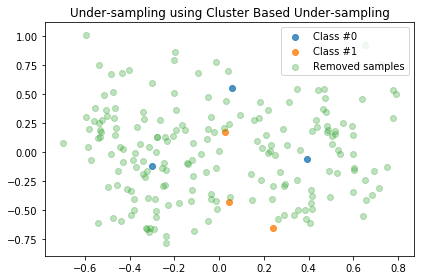


The chart below shows the distribution of the target variable:



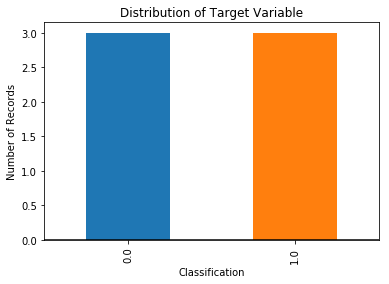

Below lists the numbers behind the frequency chart above:

Churn Flag
0.0    3.0
1.0    3.0
Name: Churn Flag, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.666666666667

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       0.67      1.00      0.80         2
      Churn       0.00      0.00      0.00         1

avg / total       0.44      0.67      0.53         3


Below is a confusion matrix for the created Decision Tree Model:

[[2 0]
 [1 0]]


Based on the cross validation sc

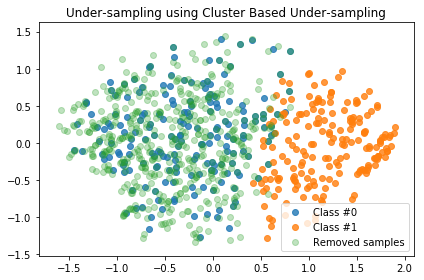


The chart below shows the distribution of the target variable:



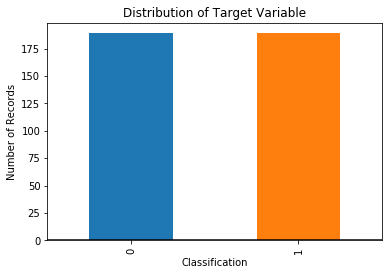

Below lists the numbers behind the frequency chart above:

Class/ASD
0    189
1    189
Name: Class/ASD, dtype: int64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00        75
     Autism       1.00      1.00      1.00        77

avg / total       1.00      1.00      1.00       152


Below is a confusion matrix for the created Decision Tree Model:

[[75  0]
 [ 0 77]]


Based on the cross validation scores distance f

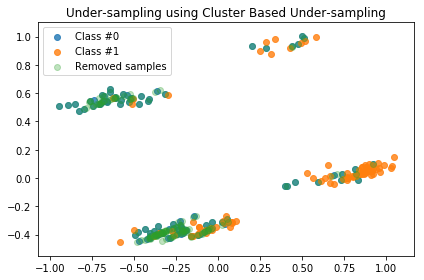


The chart below shows the distribution of the target variable:



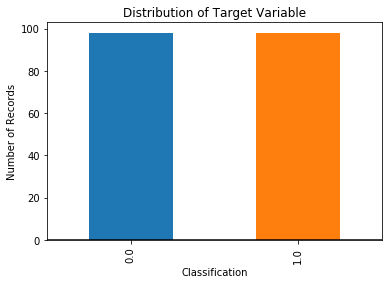

Below lists the numbers behind the frequency chart above:

num
0.0    98.0
1.0    98.0
Name: num, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.772151898734

Below is a classification report for the created Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.79      0.71      0.75        38
    High Risk       0.76      0.83      0.79        41

  avg / total       0.77      0.77      0.77        79


Below is a confusion matrix for the created Decision Tree Model:

[[27 11]
 [ 7 34]]


Based on the cross validation sc

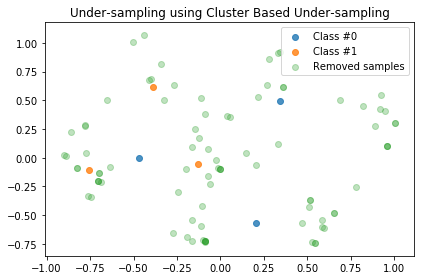


The chart below shows the distribution of the target variable:



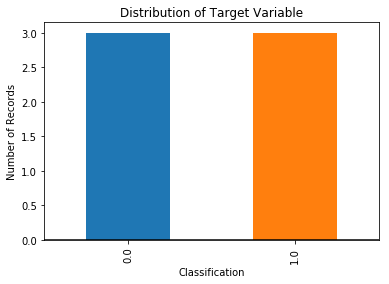

Below lists the numbers behind the frequency chart above:

Intensive_Care
0.0    3.0
1.0    3.0
Name: Intensive_Care, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.333333333333

Below is a classification report for the created Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       0.00      0.00      0.00         2
    Intensive Care       0.33      1.00      0.50         1

       avg / total       0.11      0.33      0.17         3


Below is a confusion matrix for the created Decision Tree Model:

[[0 2]
 [0 1]

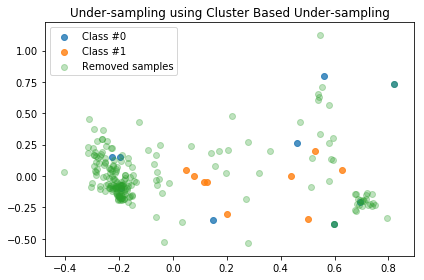


The chart below shows the distribution of the target variable:



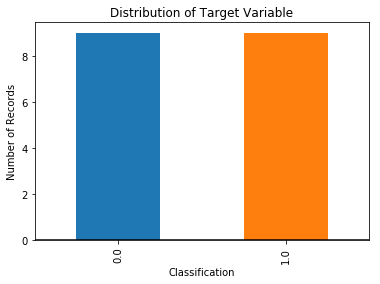

Below lists the numbers behind the frequency chart above:

Target_Type
0.0    9.0
1.0    9.0
Name: Target_Type, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.75

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       1.00      0.60      0.75         5
     Type 1       0.60      1.00      0.75         3

avg / total       0.85      0.75      0.75         8


Below is a confusion matrix for the created Decision Tree Model:

[[3 2]
 [0 3]]


Based on the cross validation scores dis

In [234]:
# Creating dummy values
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Cluster Based Under Sampling of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Conducting Cluster Based Undersampling #########################

    # Defining Cluster Based Under Sampler Function
    cluster_based_undersampling = ClusterCentroids()

    # Applying Cluster Based Under Sampler Function
    X_resampled, y_resampled = cluster_based_undersampling.fit_sample(predictor_variables_array, target_variable_array)

    # Conducting PCA on Cluster Based Under Sampled Data
    X_res_vis = pca.transform(X_resampled)

    # Creating a new data frame for predictors
    Dataset_Cluster_Sampled_Predictors = pd.DataFrame(X_resampled)
    Dataset_Cluster_Sampled_Predictors.columns = predictor_variables_columns.columns.tolist()

    # Creating a new data frame for the target
    Dataset_Cluster_Sampled_Target = pd.DataFrame({Target_Variable:y_resampled})

    # Creating a new data frame combining target and predictors
    #Dataset_Cluster_Sampled = pd.concat([Dataset_Cluster_Sampled_Target, Dataset_Cluster_Sampled_Predictors], axis=1, sort=False)
    Dataset_Cluster_Sampled = pd.concat([Dataset_Cluster_Sampled_Target, Dataset_Cluster_Sampled_Predictors], axis=1)
    
    ######################### Creating Plot #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], alpha=.8, label='Class #0')
    plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], alpha=.8, label='Class #1')
    plt.scatter(X_vis[target_variable_array == 0, 0], X_vis[target_variable_array == 0, 1], alpha=.3, label='Removed samples')

    # Further Plot Formatting
    plt.title('Under-sampling using Cluster Based Under-sampling')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Cluster_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of cluster based under sampling:")
    print('\r')
    plt.show()

    ######################### Utilizing Functions #########################

    # Displaying a frequency chart
    frequency_chart(Dataset_Cluster_Sampled)

    # Splitting the data into a test and training set
    test_train(Dataset_Cluster_Sampled)
    
    # Conducting decision tree analysis
    decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])
    
    # Storing metrics from decision tree
    cluster_accuracy = accuracy_list
    cluster_f1 = f1_list
    cluster_precision = precision_list
    cluster_recall = recall_list
    cluster_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2

### Cluster Based Sampling Commentary

As defined earlier, cluster based under sampling reduces the size of the majority class down to the size of the minroty class through sampling without replacement, or simply the removal of records. The difference between this and random under sampling is the selection of records being representative of potential clusters that are present in the data set.

> <b>Churn Data Set:</b>

> After cluster based under sampling, the Churn data set contains 3 records for each class that can be split into test and training sets. In this instance the metrics lose all value because there aren't enough records to build a reliable model as indicated by the model being inconsistent. This is a clear limitation of under sampling when the minority class is below 50 records.

> <b>Autism Data Set:</b>

> After cluster based under sampling, the autism data set contains 189 records for each class that can be split into test and training sets. The model gets a perfect score, being able to predict both classes perfectly. This may be an idication of overfitting, however, looking at the two dimensional figure, the records do appear to be linearly separable and thus easier to predict.

> <b>Heart Attacks Data Set:</b>

> After cluster based under sampling, the heart attacks data set contains 98 records for each class that can be split into test and training sets. The decision tree model performs with a 77% accuracy which is realistic from a limited dataset and default model.

> <b>Post Operation Data Set:</b>

> After cluster based under sampling, the post operation data set contains 3 records for each class that can be split into test and training sets. In this instance the metrics lose all value because there aren't enough records to build a reliable model as indicated by the model being inconsistent. This is a clear limitation of under sampling when the minority class is below 50 records.

> <b>Glass Type Data Set:</b>

> After cluster based under sampling, the glass type data set contains 9 records for each class that can be split into test and training sets. In this instance the metrics lose all value because there aren't enough records to build a reliable model as indicated by the model being inconsistent. This is a clear limitation of under sampling when the minority class is below 50 records.

The results of cluster based under sampling are comparable to random under sampling with the main theme off the lack of records being an issue. By removing rows you are always running the risk of losing valuable information and reducing the reliability of your results as seen by many of these models. One benefit of clustering vs random is that the selected points do seem more meaningful (representative), at least in the two dimensional plot.

### SMOTE (Synthetic Minority Oversampling Technique)



------------------------ Synthetic Minority Over Sampling of Churn Data ------------------------

Below is a chart that displays the impact of SMOTE:



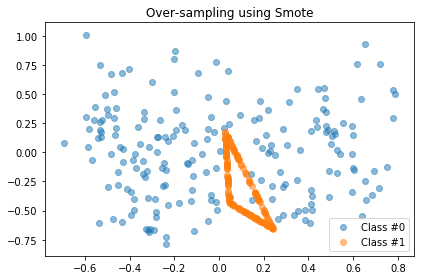


The chart below shows the distribution of the target variable:



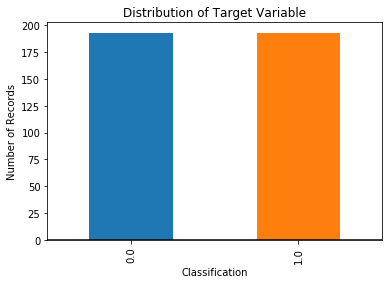

Below lists the numbers behind the frequency chart above:

Churn Flag
0.0    193.0
1.0    193.0
Name: Churn Flag, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.993548387097

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       0.99      1.00      0.99        76
      Churn       1.00      0.99      0.99        79

avg / total       0.99      0.99      0.99       155


Below is a confusion matrix for the created Decision Tree Model:

[[76  0]
 [ 1 78]]


Based on the cross valid

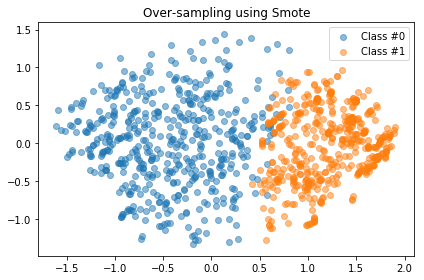


The chart below shows the distribution of the target variable:



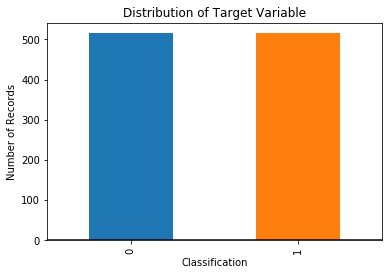

Below lists the numbers behind the frequency chart above:

Class/ASD
0    515
1    515
Name: Class/ASD, dtype: int64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00       204
     Autism       1.00      1.00      1.00       208

avg / total       1.00      1.00      1.00       412


Below is a confusion matrix for the created Decision Tree Model:

[[204   0]
 [  0 208]]


Based on the cross validation scores distan

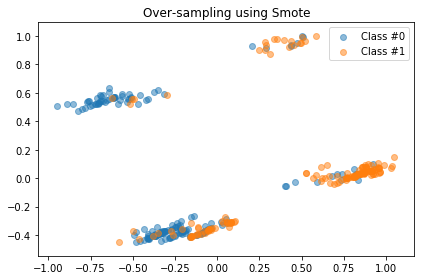


The chart below shows the distribution of the target variable:



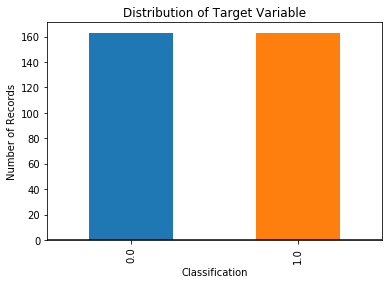

Below lists the numbers behind the frequency chart above:

num
0.0    163.0
1.0    163.0
Name: num, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.786259541985

Below is a classification report for the created Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.83      0.74      0.78        68
    High Risk       0.75      0.84      0.79        63

  avg / total       0.79      0.79      0.79       131


Below is a confusion matrix for the created Decision Tree Model:

[[50 18]
 [10 53]]


Based on the cross validation 

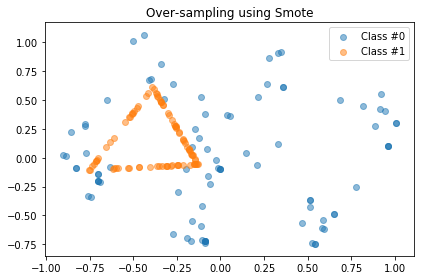


The chart below shows the distribution of the target variable:



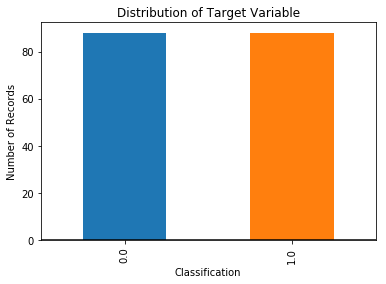

Below lists the numbers behind the frequency chart above:

Intensive_Care
0.0    88.0
1.0    88.0
Name: Intensive_Care, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.985915492958

Below is a classification report for the created Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       1.00      0.97      0.98        33
    Intensive Care       0.97      1.00      0.99        38

       avg / total       0.99      0.99      0.99        71


Below is a confusion matrix for the created Decision Tree Model:

[[32  1]
 [

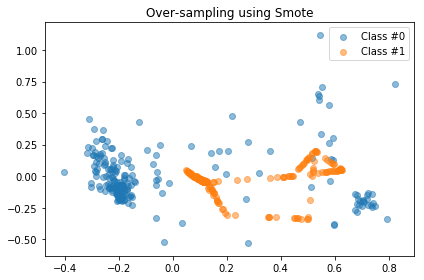


The chart below shows the distribution of the target variable:



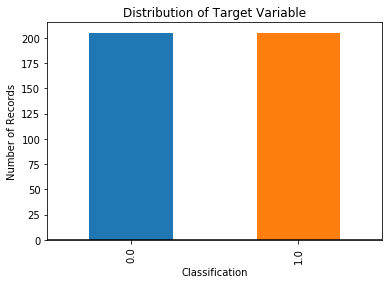

Below lists the numbers behind the frequency chart above:

Target_Type
0.0    205.0
1.0    205.0
Name: Target_Type, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       1.00      1.00      1.00        84
     Type 1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       164


Below is a confusion matrix for the created Decision Tree Model:

[[84  0]
 [ 0 80]]


Based on the cross validation sco

In [235]:
# Creating dummy values
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Synthetic Minority Over Sampling of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Conducting Random Oversampling #########################

    # Defining SMOTE Function
    smote_sampler = SMOTE(random_state=42, k_neighbors=2)

    # Applying SMOTE Function
    X_resampled, y_resampled = smote_sampler.fit_sample(predictor_variables_array, target_variable_array)

    # Conducting PCA on SMOTE Data
    X_res_vis = pca.transform(X_resampled)

    # Creating a new data frame for predictors
    Dataset_Smote_Predictors = pd.DataFrame(X_resampled)
    Dataset_Smote_Predictors.columns = predictor_variables_columns.columns.tolist()

    # Creating a new data frame for the target
    Dataset_Smote_Target = pd.DataFrame({Target_Variable:y_resampled})

    # Creating a new data frame combining target and predictors
    #Dataset_Smote_Sampled = pd.concat([Dataset_Smote_Target, Dataset_Smote_Predictors], axis=1, sort=False)
    Dataset_Smote_Sampled = pd.concat([Dataset_Smote_Target, Dataset_Smote_Predictors], axis=1)

    ######################### Creating Plot #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], alpha=.5, label='Class #0')
    plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], alpha=.5, label='Class #1')

    # Further Plot Formatting
    plt.title('Over-sampling using Smote')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\SMOTE_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of SMOTE:")
    print('\r')
    plt.show()

    ######################### Utilizing Functions #########################

    # Displaying a frequency chart
    frequency_chart(Dataset_Smote_Sampled)

    # Splitting the data into a test and training set
    test_train(Dataset_Smote_Sampled)

    # Conducting decision tree analysis
    decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])
    
    # Storing metrics from decision tree
    smote_accuracy = accuracy_list
    smote_f1 = f1_list
    smote_precision = precision_list
    smote_recall = recall_list
    smote_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2

### SMOTE Sampling Commentary

As defined earlier, SMOTE is a more complex sampling method that creates new records for the minority class to match the number majority class records.

> Visually in each plot you can see records for the minority class being created in a somewhat systematic fashion. With all data sets achieving better results from the baseline tree model than the previous sampling methods. This can be attributed to the fact that information is not being lost from the removal of records, and records are not being duplicated such that the model no longer has to predict.

### ADASYN (Adaptive Synthetic Over Sampling)



------------------------ Adaptive Synthetic Over Sampling of Churn Data ------------------------

Below is a chart that displays the impact of ADASYN:



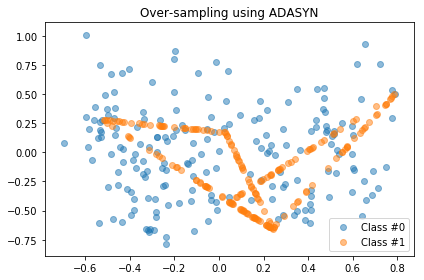


The chart below shows the distribution of the target variable:



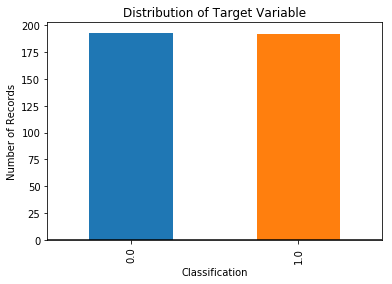

Below lists the numbers behind the frequency chart above:

Churn Flag
0.0    193.0
1.0    192.0
Name: Churn Flag, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.974025974026

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       0.97      0.97      0.97        75
      Churn       0.97      0.97      0.97        79

avg / total       0.97      0.97      0.97       154


Below is a confusion matrix for the created Decision Tree Model:

[[73  2]
 [ 2 77]]


Based on the cross valid

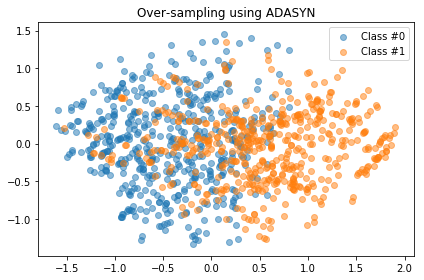


The chart below shows the distribution of the target variable:



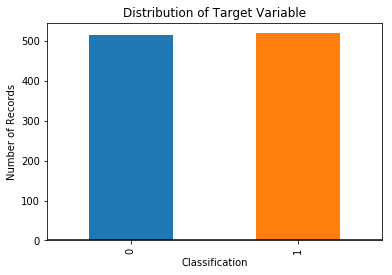

Below lists the numbers behind the frequency chart above:

Class/ASD
0    515
1    519
Name: Class/ASD, dtype: int64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.985507246377

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       0.99      0.98      0.98       201
     Autism       0.98      0.99      0.99       213

avg / total       0.99      0.99      0.99       414


Below is a confusion matrix for the created Decision Tree Model:

[[197   4]
 [  2 211]]


Based on the cross validation sc

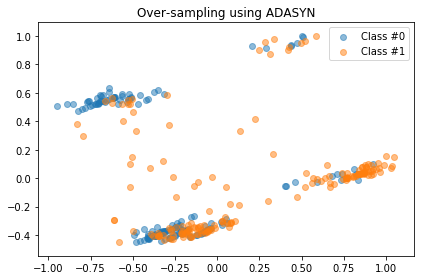


The chart below shows the distribution of the target variable:



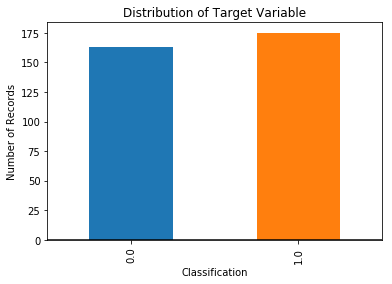

Below lists the numbers behind the frequency chart above:

num
0.0    163.0
1.0    175.0
Name: num, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.720588235294

Below is a classification report for the created Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.73      0.71      0.72        69
    High Risk       0.71      0.73      0.72        67

  avg / total       0.72      0.72      0.72       136


Below is a confusion matrix for the created Decision Tree Model:

[[49 20]
 [18 49]]


Based on the cross validation 

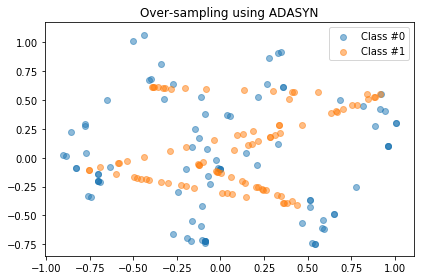


The chart below shows the distribution of the target variable:



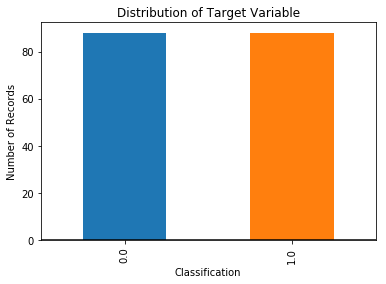

Below lists the numbers behind the frequency chart above:

Intensive_Care
0.0    88.0
1.0    88.0
Name: Intensive_Care, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.971830985915

Below is a classification report for the created Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       0.97      0.97      0.97        33
    Intensive Care       0.97      0.97      0.97        38

       avg / total       0.97      0.97      0.97        71


Below is a confusion matrix for the created Decision Tree Model:

[[32  1]
 [

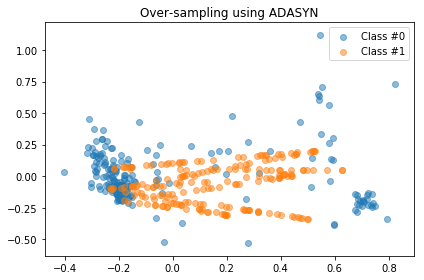


The chart below shows the distribution of the target variable:



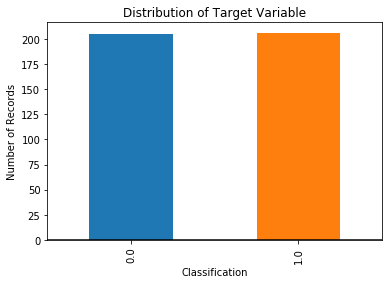

Below lists the numbers behind the frequency chart above:

Target_Type
0.0    205.0
1.0    206.0
Name: Target_Type, dtype: float64


Below are the parameters for the Decision Tree Model:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Decision Tree Model has an Accuracy Score of 0.927272727273

Below is a classification report for the created Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       0.96      0.89      0.93        84
     Type 1       0.90      0.96      0.93        81

avg / total       0.93      0.93      0.93       165


Below is a confusion matrix for the created Decision Tree Model:

[[75  9]
 [ 3 78]]


Based on the cross val

In [236]:
# Creating dummy values
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Adaptive Synthetic Over Sampling of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Conducting Adaptive Synthetic Oversampling #########################

    # Defining ADASYN Function
    adasyn_sampler = ADASYN(random_state=42, n_neighbors=2)

    # Applying ADASYN Function
    X_resampled, y_resampled = adasyn_sampler.fit_sample(predictor_variables_array, target_variable_array)

    # Conducting PCA on ADASYN Data
    X_res_vis = pca.transform(X_resampled)

    # Creating a new data frame for predictors
    Dataset_Adasyn_Predictors = pd.DataFrame(X_resampled)
    Dataset_Adasyn_Predictors.columns = predictor_variables_columns.columns.tolist()

    # Creating a new data frame for the target
    Dataset_Adasyn_Target = pd.DataFrame({Target_Variable:y_resampled})

    # Creating a new data frame combining target and predictors
    #Dataset_Adasyn_Sampled = pd.concat([Dataset_Adasyn_Target, Dataset_Adasyn_Predictors], axis=1, sort=False)
    Dataset_Adasyn_Sampled = pd.concat([Dataset_Adasyn_Target, Dataset_Adasyn_Predictors], axis=1)

    ######################### Creating Plot #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], alpha=.5, label='Class #0')
    plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], alpha=.5, label='Class #1')

    # Further Plot Formatting
    plt.title('Over-sampling using ADASYN')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\ADASYN_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of ADASYN:")
    print('\r')
    plt.show()

    ######################### Utilizing Functions #########################

    # Displaying a frequency chart
    frequency_chart(Dataset_Adasyn_Sampled)

    # Splitting the data into a test and training set
    test_train(Dataset_Adasyn_Sampled)

    # Conducting decision tree analysis
    decision_tree_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])
    
    # Storing metrics from decision tree
    adasyn_accuracy = accuracy_list
    adasyn_f1 = f1_list
    adasyn_precision = precision_list
    adasyn_recall = recall_list
    adasyn_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2

### ADASYN Sampling Commentary

As defined earlier, ADASYN is a more complex sampling method that creates new records for the minority class to match the number majority class records. It was a method created as an extension to SMOTE.

> Visually in each plot you can see records for the minority class being created in a somewhat systematic fashion with more variance than SMOTE. With all data sets achieving better results from the baseline tree model than the previous sampling methods, other than SMOTE. This can be attributed to the fact that once again information is not being lost from the removal of records, and records are not being duplicated such that the model no longer has to predict. The method for creating new records does seem more 'aggresive', in other words in two dimensions, the the representation of some of the records do not align with the initial minority class records, however, this may be a simple limitation of veiwing the first two principal components of the data.

### Bagging Based



------------------------ Bagging of Churn Data ------------------------

Below is a chart that displays the impact of random undersampling:



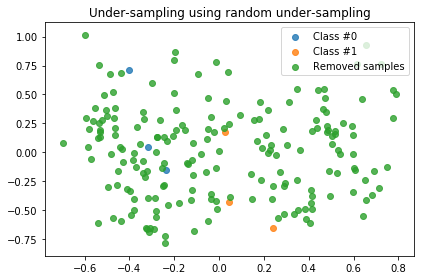


Below are the parameters for the Bagging Decision Tree Model:

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

The Bagging Decision Tree Model has an Accuracy Score of 0.666666666667

Below is a classification report for the created bagging Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       0.67      1.00      0.80         2
      Churn       0.00      0.00      0.00         1

avg / total       0.44      0.67      0.53

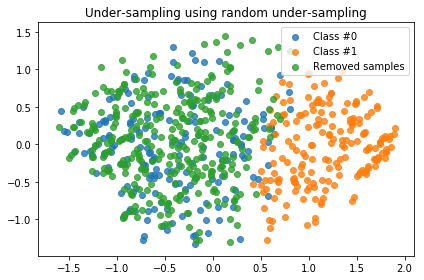


Below are the parameters for the Bagging Decision Tree Model:

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

The Bagging Decision Tree Model has an Accuracy Score of 0.697368421053

Below is a classification report for the created bagging Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       0.66      0.79      0.72        75
     Autism       0.75      0.61      0.67        77

avg / total       0.71      0.70      0.70

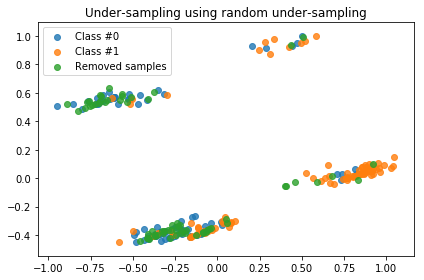


Below are the parameters for the Bagging Decision Tree Model:

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

The Bagging Decision Tree Model has an Accuracy Score of 0.746835443038

Below is a classification report for the created bagging Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.70      0.84      0.76        38
    High Risk       0.82      0.66      0.73        41

  avg / total       0.76      0.75  

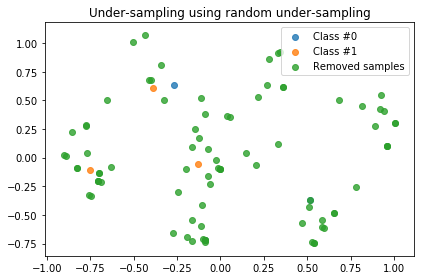


Below are the parameters for the Bagging Decision Tree Model:

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

The Bagging Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created bagging Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Care       1.00      1.00      1.00         2
    Intensive Care       1.00      1.00      1.00         1

       avg / total       1.00   

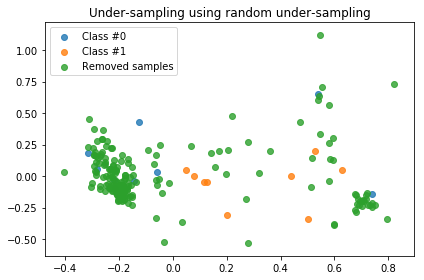


Below are the parameters for the Bagging Decision Tree Model:

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

The Bagging Decision Tree Model has an Accuracy Score of 0.375

Below is a classification report for the created bagging Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       0.00      0.00      0.00         5
     Type 1       0.38      1.00      0.55         3

avg / total       0.14      0.38      0.20         

In [237]:
# Creating dummy values
save_value = 1
dataset_value = 0
name_value = 0
dummy_cv = 1

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Bagging of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

   ######################### Conducting Bagging (Random Undersampling) #########################

    # Defining Random Under Sampler Function
    random_under_sampler = RandomUnderSampler(return_indices=True)

    # Applying Random Under Sampler Function
    X_resampled, y_resampled, idx_resampled = random_under_sampler.fit_sample(predictor_variables_array, target_variable_array)

    # Conducting PCA on Random Under Sampled Data
    X_res_vis = pca.transform(X_resampled)

    # Storing the observations that were not sampled by calculating the difference
    idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),idx_resampled)

    # Creating a new data frame
    Dataset_Under_Sampled = dataset.loc[idx_resampled]

    ######################### Creating Plot #########################

    # Defining the plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Defining each class as an individual scatter plot
    idx_class_0 = y_resampled == 0
    plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1], alpha=.8, label='Class #0')
    plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1], alpha=.8, label='Class #1')
    plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1], alpha=.8, label='Removed samples')

    # Further Plot Formatting
    plt.title('Under-sampling using random under-sampling')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Bagging_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of random undersampling:")
    print('\r')
    plt.show()
    
    ######################### Utilizing Functions #########################
    
    # Splitting the data into a test and train set
    test_train(Dataset_Under_Sampled)
    
    # Conducting adaptive boosting analysis
    bagging_analysis(features_train, target_train, features_test, target_test, target_name_list, list_of_dataset_names[dataset_value])

    # Storing metrics from adaboost model
    bagging_accuracy = accuracy_list
    bagging_f1 = f1_list
    bagging_precision = precision_list
    bagging_recall = recall_list
    bagging_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2
    dummy_cv = dummy_cv + 1

### Bagging Based Ensemble Commentary

The bagging based ensemble classifier on imbalanced learn utilizes a random under sampler before applying a bagging ensemble algorithm similar to the one present on sci-kit learn. The images above are from simple random under sampling because I had trouble working with the bagging classifier on imbalanced learn.

> In general the models were either poor or overfit. This may have been because I was not able to use the imbalanced learn form of the bagging classifier which may handle connection between random under sampling and the bagging ensemble differently.

### Adaptive Boosting Based



------------------------ Adaptive Boosting of Churn Data ------------------------

Below is a chart that displays the impact of Balance Cascade Adaboost:



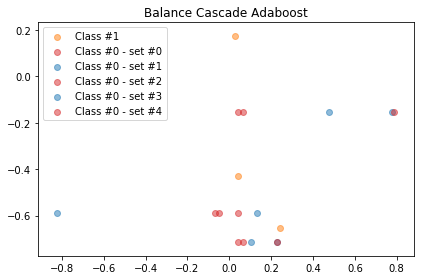

Resampled dataset 1 shape Counter({0: 3, 1: 3})
Resampled dataset 2 shape Counter({0: 3, 1: 3})
Resampled dataset 3 shape Counter({0: 3, 1: 3})
Resampled dataset 4 shape Counter({0: 3, 1: 3})
Resampled dataset 5 shape Counter({0: 3, 1: 3})

Below are the parameters for the Decision Tree Model:

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

The ADA Decision Tree Model has an Accuracy Score of 0.962025316456

Below is a classification report for the created ADA Decision Tree Model:

             precision    recall  f1-score   support

   No Churn       0.99  

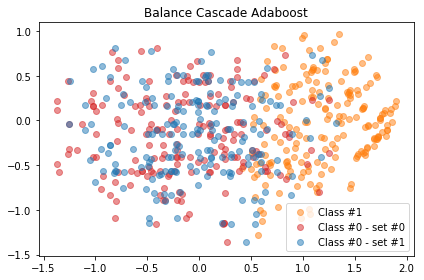

Resampled dataset 1 shape Counter({0: 189, 1: 189})
Resampled dataset 2 shape Counter({0: 189, 1: 189})

Below are the parameters for the Decision Tree Model:

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

The ADA Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created ADA Decision Tree Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00       210
     Autism       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00       282


Below is 

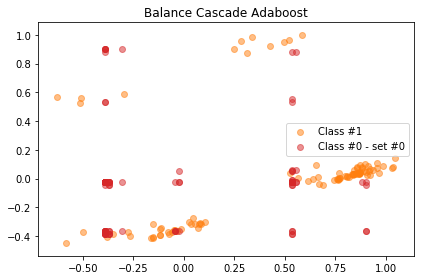

Resampled dataset 1 shape Counter({0: 98, 1: 98})

Below are the parameters for the Decision Tree Model:

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

The ADA Decision Tree Model has an Accuracy Score of 0.733333333333

Below is a classification report for the created ADA Decision Tree Model:

               precision    recall  f1-score   support

Not High Risk       0.84      0.74      0.79        70
    High Risk       0.58      0.71      0.64        35

  avg / total       0.75      0.73      0.74       105


Below is a confusion matrix for the created 

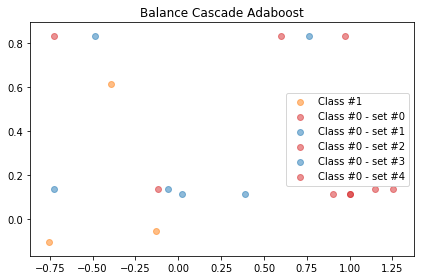

Resampled dataset 1 shape Counter({0: 3, 1: 3})
Resampled dataset 2 shape Counter({0: 3, 1: 3})
Resampled dataset 3 shape Counter({0: 3, 1: 3})
Resampled dataset 4 shape Counter({0: 3, 1: 3})
Resampled dataset 5 shape Counter({0: 3, 1: 3})

Below are the parameters for the Decision Tree Model:

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

The ADA Decision Tree Model has an Accuracy Score of 0.972972972973

Below is a classification report for the created ADA Decision Tree Model:

                    precision    recall  f1-score   support

Not Intensive Car

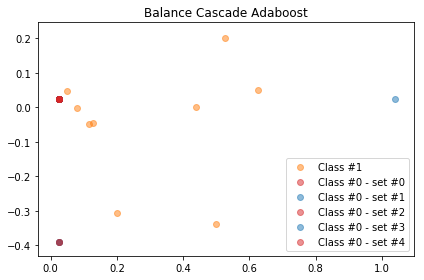

Resampled dataset 1 shape Counter({0: 9, 1: 9})
Resampled dataset 2 shape Counter({0: 9, 1: 9})
Resampled dataset 3 shape Counter({0: 9, 1: 9})
Resampled dataset 4 shape Counter({0: 9, 1: 9})
Resampled dataset 5 shape Counter({0: 9, 1: 9})

Below are the parameters for the Decision Tree Model:

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

The ADA Decision Tree Model has an Accuracy Score of 0.96511627907

Below is a classification report for the created ADA Decision Tree Model:

             precision    recall  f1-score   support

 Not Type 1       1.00   

In [238]:
# Creating dummy values
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Adaptive Boosting of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Conducting Adaptive Boosting Undersampling #########################

    # Defining Adaptive Boosting Function
    ada_sampler = BalanceCascade(classifier = 'adaboost', random_state=42, n_max_subset=5, return_indices=True)
    
    # Applying Adaptive Boosting Function
    X_resampled, y_resampled, idx_resampled = ada_sampler.fit_sample(predictor_variables_array.astype(int), target_variable_array.astype(int))

    # Conducting PCA on Adaptive Boosting Data
    X_res_vis = []
    for X_res in X_resampled:
        X_res_vis.append(pca.transform(X_res))

    ######################### Creating Plot #########################

    # Defining plot layout
    f, (ax2) = plt.subplots(1, 1)

    # Defining a counter
    count = 0
    
    # Defining a list of colors to iterate through
    list_of_colors = ["#d62728","#1f77b4"]

    # Defining the plot
    ax2.scatter(X_vis[target_variable_array.astype(int) == 1, 0], X_vis[target_variable_array.astype(int) == 1, 1], label="Class #1", color="#ff7f0e", alpha=0.5)
    for iy, e in enumerate(X_res_vis):
        ax2.scatter(e[y_resampled[iy] == 0, 1], e[y_resampled[iy] == 1, 1],
                    label="Class #0 - set #{}".format(iy), color=list_of_colors[count], alpha=0.5)
        count = count + 1
        if (count == 2):
            count = 0

    # Further Plot Formatting
    ax2.set_title('Balance Cascade Adaboost')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\ADA_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of Balance Cascade Adaboost:")
    print('\r')
    plt.show()
    
    # Creating a list to store all of the subset dataframe names
    Dataset_Adaboost_Sampled = []
    
    # Creating a loop to print out the number of subsets and store them
    number = 0
    for iy, e in enumerate(X_res_vis):
        print('Resampled dataset ' + str(number+1) + ' shape {}'.format(Counter(y_resampled[number])))
        
        # Storing the observations that were not sampled by calculating the difference
        idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),idx_resampled)

        # Creating a new subset name for each iteration so that each subset can be stored
        subset_name = list_of_dataset_names[dataset_value]+"_Adaboost_Sampled_"+str(number+1)
        subset_name.replace(" ", "_")
        
        # Setting the subset name equal to the records used in each subset
        vars()[subset_name] = dataset.loc[idx_resampled[number]]
        
        # Appending subset name to list
        Dataset_Adaboost_Sampled.append(subset_name)
        
        # Displaying a frequency charts
        multiple_frequency_charts(vars()[subset_name],subset_name)
        
        # Forcing iteration
        number = number + 1
    
    ######################### Utilizing Functions #########################
    
    # Splitting the data into a test and train set
    test_train(dataset)
    
    # Conducting adaptive boosting analysis
    adaptive_boosting_analysis(features_train, target_train, features_test, target_test, target_name_list)
    
    # Storing metrics from adaboost model
    ada_accuracy = accuracy_list
    ada_f1 = f1_list
    ada_precision = precision_list
    ada_recall = recall_list
    ada_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2

### ADA Ensemble Commentary

As defined earlier, the ADAboost model will create numerous subsets of the majority class that match the dimensions of the minority class in order to build several weak learners that will have their output evaluated together via a voting system for a stronger prediction.

> In essence we are seeing the same problem that occurred with under sampling. The number of observations in the minority class is so low that the under sampling the majority class means that the models can no longer be reliable since they are built off so few records. No information is necessarily lost because all the records are present across the numerous subsets, however they do not all contribute to one model. Hence you are seeing a variety of different results dependent on the data set. Some models are overfit whilst the majority are simply inconsistent.

### Gradient Tree Boosted



------------------------ Gradient Boosting of Churn Data ------------------------

Below is a chart that displays the impact of Balance Cascade Gradient:



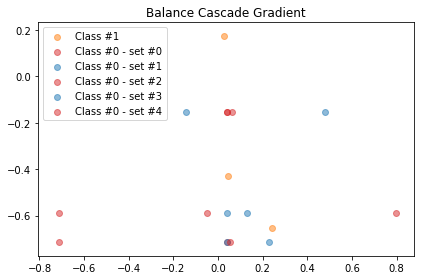

Resampled dataset 1 shape Counter({0: 3, 1: 3})
Resampled dataset 2 shape Counter({0: 3, 1: 3})
Resampled dataset 3 shape Counter({0: 3, 1: 3})
Resampled dataset 4 shape Counter({0: 3, 1: 3})
Resampled dataset 5 shape Counter({0: 3, 1: 3})

Below are the parameters for the Gradient Boost Model:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

The ADA Decision Tree Model has an Accuracy Score of 0.962025316456

Below is a classification report for the created Gradient Boost Model:

             precision    recall  f1-score   support

   No Churn       0.99      0.97    

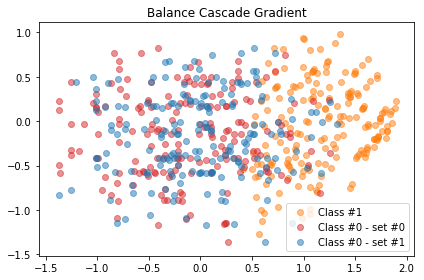

Resampled dataset 1 shape Counter({0: 189, 1: 189})
Resampled dataset 2 shape Counter({0: 189, 1: 189})

Below are the parameters for the Gradient Boost Model:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

The ADA Decision Tree Model has an Accuracy Score of 1.0

Below is a classification report for the created Gradient Boost Model:

             precision    recall  f1-score   support

  No Autism       1.00      1.00      1.00       210
     Autism       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00       282


Below is a confusion 

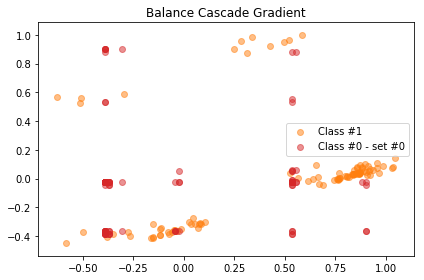

Resampled dataset 1 shape Counter({0: 98, 1: 98})

Below are the parameters for the Gradient Boost Model:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

The ADA Decision Tree Model has an Accuracy Score of 0.780952380952

Below is a classification report for the created Gradient Boost Model:

               precision    recall  f1-score   support

Not High Risk       0.86      0.80      0.83        70
    High Risk       0.65      0.74      0.69        35

  avg / total       0.79      0.78      0.78       105


Below is a confusion matrix for the created Gradient Boo

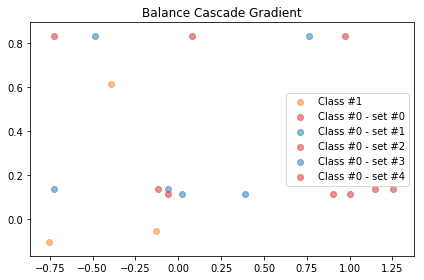

Resampled dataset 1 shape Counter({0: 3, 1: 3})
Resampled dataset 2 shape Counter({0: 3, 1: 3})
Resampled dataset 3 shape Counter({0: 3, 1: 3})
Resampled dataset 4 shape Counter({0: 3, 1: 3})
Resampled dataset 5 shape Counter({0: 3, 1: 3})

Below are the parameters for the Gradient Boost Model:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

The ADA Decision Tree Model has an Accuracy Score of 0.972972972973

Below is a classification report for the created Gradient Boost Model:

                    precision    recall  f1-score   support

Not Intensive Care       1.00

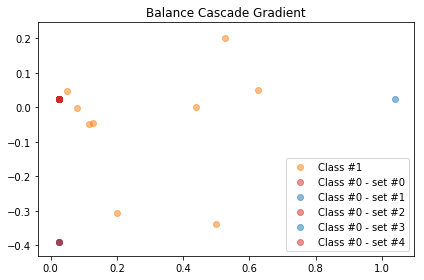

Resampled dataset 1 shape Counter({0: 9, 1: 9})
Resampled dataset 2 shape Counter({0: 9, 1: 9})
Resampled dataset 3 shape Counter({0: 9, 1: 9})
Resampled dataset 4 shape Counter({0: 9, 1: 9})
Resampled dataset 5 shape Counter({0: 9, 1: 9})

Below are the parameters for the Gradient Boost Model:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

The ADA Decision Tree Model has an Accuracy Score of 0.96511627907

Below is a classification report for the created Gradient Boost Model:

             precision    recall  f1-score   support

 Not Type 1       1.00      0.96     

In [239]:
# Creating a dummy value
save_value = 1
dataset_value = 0
name_value = 0

# Creating empty lists to store results
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
consistency_list = []

# Creating a for loop to run the analysis on all datasets
for dataset in list_of_datasets:
    
    print('\r')
    print('\r')
    print("------------------------ Gradient Boosting of " + list_of_dataset_names[dataset_value] + " Data ------------------------")
    
    # Creating a list of target names to iterate through
    target_name_list = list_of_target_variables[name_value:name_value+2]
    
    # Designating Target Variable
    Target_Variable = dataset.columns[0]
    Target_Series = dataset[Target_Variable]
    
    # Defining Target Variable Column
    target_variable_column = dataset[Target_Variable]
    
    # Creating a data set contains all the predictor variables
    predictor_variables_columns = dataset.drop([Target_Variable], axis=1)

    # Storing target variable and predictor variables to arrays for PCA
    target_variable_array = target_variable_column.values
    predictor_variables_array = predictor_variables_columns.values
    
    ######################### Establishing PCA #########################

    # Defining PCA Transformation
    pca = PCA(n_components=2)

    # Applying PCA Transformation to achieve 2D representation
    X_vis = pca.fit_transform(predictor_variables_array)

    ######################### Conducting Gradient Tree Boosting Undersampling #########################

    # Defining Gradient Boosting Function
    gradient_sampler = BalanceCascade(classifier = 'gradient-boosting', random_state=42, n_max_subset=5)
    
    # Applying Gradient Boosting Function
    X_resampled, y_resampled = gradient_sampler.fit_sample(predictor_variables_array.astype(int), target_variable_array.astype(int))
    
    # Conducting PCA on Gradient Boosting Data
    X_res_vis = []
    for X_res in X_resampled:
        X_res_vis.append(pca.transform(X_res))

    ######################### Creating Plot #########################

    # Defining plot layout
    f, (ax2) = plt.subplots(1, 1)

    # Defining a counter
    count = 0
    
    # Defining a list of colors to iterate through
    list_of_colors = ["#d62728","#1f77b4"]

    # Defining the plot
    ax2.scatter(X_vis[target_variable_array.astype(int) == 1, 0], X_vis[target_variable_array.astype(int) == 1, 1], label="Class #1", color="#ff7f0e", alpha=0.5)
    for iy, e in enumerate(X_res_vis):
        ax2.scatter(e[y_resampled[iy] == 0, 1], e[y_resampled[iy] == 1, 1],
                    label="Class #0 - set #{}".format(iy), color=list_of_colors[count], alpha=0.5)
        count = count + 1
        if (count == 2):
            count = 0

    # Further Plot Formatting
    ax2.set_title('Balance Cascade Gradient')
    plt.legend()
    plt.tight_layout()

    # Saving plot for comparison
    plt.savefig(pathname + 'Images\\Gradient_' + str(save_value) + '.png', bbox_inches='tight')
    
    # Displaying the Plot
    print('\r')
    print("Below is a chart that displays the impact of Balance Cascade Gradient:")
    print('\r')
    plt.show()

    # Creating a list to store all of the subset dataframe names
    Dataset_Gradient_Sampled = []
    
    # Creating a loop to print out the number of subsets and store them
    number = 0
    for iy, e in enumerate(X_res_vis):
        print('Resampled dataset ' + str(number+1) + ' shape {}'.format(Counter(y_resampled[number])))
        
        # Storing the observations that were not sampled by calculating the difference
        idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),idx_resampled)

        # Creating a new subset name for each iteration so that each subset can be stored
        subset_name = list_of_dataset_names[dataset_value]+"_Gradient_Sampled_"+str(number+1)
        subset_name.replace(" ", "_")
        
        # Setting the subset name equal to the records used in each subset
        vars()[subset_name] = dataset.loc[idx_resampled[number]]
        
        # Appending subset name to list
        Dataset_Gradient_Sampled.append(subset_name)
        
        # Displaying a frequency charts
        multiple_frequency_charts(vars()[subset_name],subset_name)
        
        # Forcing iteration
        number = number + 1
    
    ######################### Utilizing Functions #########################

    # Splitting the data into a test and train set
    test_train(dataset)
    
    # Conducting adaptive boosting analysis
    gradient_boosting_analysis(features_train, target_train, features_test, target_test, target_name_list)
    
    # Storing metrics from adaboost model
    gradient_accuracy = accuracy_list
    gradient_f1 = f1_list
    gradient_precision = precision_list
    gradient_recall = recall_list
    gradient_consistency = consistency_list
    
    # Increasing dummy value each time for loop is complete
    save_value = save_value + 1
    dataset_value = dataset_value + 1
    name_value = name_value + 2

### Gradient Tree Ensemble Commentary

As defined earlier, the Gradient Tree ensemble model will create numerous subsets of the majority class that match the dimensions of the minority class in order to build several weak learners that will have their output evaluated together via a voting system for a stronger prediction.

> In essence we are seeing the same problem that occurred with under sampling. The number of observations in the minority class is so low that the under sampling the majority class means that the models can no longer be reliable since they are built off so few records. No information is necessarily lost because all the records are present across the numerous subsets, however they do not all contribute to one model. Hence you are seeing a variety of different results dependent on the data set. Some models are overfit whilst the majority are simply inconsistent.

# Summary

### Churn Data Set Visual Summary

<tr>
    <td> <img src="Baseline_1.png" alt="Drawing"/> </td>
    <td> <img src="Random_Under_1.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="Random_Over_1.png" alt="Drawing"/> </td>
    <td> <img src="Cluster_1.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="SMOTE_1.png" alt="Drawing"/> </td>
    <td> <img src="ADASYN_1.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="ADA_1.png" alt="Drawing"/> </td>
    <td> <img src="Gradient_1.png" alt="Drawing"/> </td>
</tr>

### Churn Data Set Numeric Summary

In [240]:
# Storing all comparison data
churn_analysis = [['Churn','Baseline','N/A',baseline_accuracy[0],baseline_precision[0],baseline_recall[0],baseline_f1[0],baseline_consistency[0]],
                 ['Churn',list_of_approaches[0],'Sampling',random_under_accuracy[0],random_under_precision[0],random_under_recall[0],random_under_f1[0],random_under_consistency[0]],
                 ['Churn',list_of_approaches[1],'Sampling',random_over_accuracy[0],random_over_precision[0],random_over_recall[0],random_over_f1[0],random_over_consistency[0]],
                 ['Churn',list_of_approaches[2],'Sampling',cluster_accuracy[0],cluster_precision[0],cluster_recall[0],cluster_f1[0],cluster_consistency[0]],
                 ['Churn',list_of_approaches[3],'Sampling',smote_accuracy[0],smote_precision[0],smote_recall[0],smote_f1[0],smote_consistency[0]],
                 ['Churn',list_of_approaches[4],'Sampling',adasyn_accuracy[0],adasyn_precision[0],adasyn_recall[0],adasyn_f1[0],adasyn_consistency[0]],
                 ['Churn',list_of_approaches[5],'Ensemble',bagging_accuracy[0],bagging_precision[0],bagging_recall[0],bagging_f1[0],bagging_consistency[0]],
                 ['Churn',list_of_approaches[6],'Ensemble',ada_accuracy[0],ada_precision[0],ada_recall[0],ada_f1[0],ada_consistency[0]],
                 ['Churn',list_of_approaches[7],'Ensemble',gradient_accuracy[0],gradient_precision[0],gradient_recall[0],gradient_f1[0],gradient_consistency[0]]]

# Creating data frame to hold data
Churn_Analysis_Data_Frame = pd.DataFrame(churn_analysis,columns=['Data Set','Method','Sampling/Ensemble','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
display(Churn_Analysis_Data_Frame)

,Data Set,Method,Sampling/Ensemble,Accuracy,Precision,Recall,F1 Score,Consistency
0,Churn,Baseline,N/A,0.962025,0.000000,0.000000,0.000000,Consistent
1,Churn,Random Under-Sampling,Sampling,0.666667,0.000000,0.000000,0.000000,Inconsistent
2,Churn,Random Over-Sampling,Sampling,1.000000,1.000000,1.000000,1.000000,Consistent
3,Churn,Cluster Based Over-Sampling,Sampling,0.666667,0.000000,0.000000,0.000000,Inconsistent
4,Churn,Synthetic Minority Oversampling (SMOTE),Sampling,0.993548,1.000000,0.987342,0.993631,Consistent
5,Churn,Adaptive Synthetic Oversampling (ADASYN),Sampling,0.974026,0.974684,0.974684,0.974684,Inconsistent
6,Churn,Bagging-Based,Ensemble,0.666667,0.000000,0.000000,0.000000,Undetermined
7,Churn,Adaptive Boosting-Based,Ensemble,0.962025,0.000000,0.000000,0.000000,Consistent
8,Churn,Gradient Tree Boosting-Based,Ensemble,0.962025,0.000000,0.000000,0.000000,Consistent


### Churn Data Set Commentary

> By simply looking at the table above, you can immediately disregard any method that either has an accuracy of 1.0 or a low precision value because this is a good indication of an overfit model that is only predicting the majority class. For the churn data set it appears that the SMOTE method handles the imbalance the best and in turn produces the best Decision Tree Model because all other models are either inconsistent, only predicting the majority class or overfit.

<b>Chosen Method</b>: SMOTE

### Autism Data Set Visual Summary

<tr>
    <td> <img src="Baseline_2.png" alt="Drawing"/> </td>
    <td> <img src="Random_Under_2.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="Random_Over_2.png" alt="Drawing"/> </td>
    <td> <img src="Cluster_2.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="SMOTE_2.png" alt="Drawing"/> </td>
    <td> <img src="ADASYN_2.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="ADA_2.png" alt="Drawing"/> </td>
    <td> <img src="Gradient_2.png" alt="Drawing"/> </td>
</tr>

### Autism Data Set Numeric Summary

In [241]:
# Storing all comparison data
autism_analysis = [['Autism','Baseline','N/A',baseline_accuracy[1],baseline_precision[1],baseline_recall[1],baseline_f1[1],baseline_consistency[1]],
                  ['Autism',list_of_approaches[0],'Sampling',random_under_accuracy[1],random_under_precision[1],random_under_recall[1],random_under_f1[1],random_under_consistency[1]],
                  ['Autism',list_of_approaches[1],'Sampling',random_over_accuracy[1],random_over_precision[1],random_over_recall[1],random_over_f1[1],random_over_consistency[1]],
                  ['Autism',list_of_approaches[2],'Sampling',cluster_accuracy[1],cluster_precision[1],cluster_recall[1],cluster_f1[1],cluster_consistency[1]],
                  ['Autism',list_of_approaches[3],'Sampling',smote_accuracy[1],smote_precision[1],smote_recall[1],smote_f1[1],smote_consistency[1]],
                  ['Autism',list_of_approaches[4],'Sampling',adasyn_accuracy[1],adasyn_precision[1],adasyn_recall[1],adasyn_f1[1],adasyn_consistency[1]],
                  ['Autism',list_of_approaches[5],'Ensemble',bagging_accuracy[1],bagging_precision[1],bagging_recall[1],bagging_f1[1],bagging_consistency[1]],
                  ['Autism',list_of_approaches[6],'Ensemble',ada_accuracy[1],ada_precision[1],ada_recall[1],ada_f1[1],ada_consistency[1]],
                  ['Autism',list_of_approaches[7],'Ensemble',gradient_accuracy[1],gradient_precision[1],gradient_recall[1],gradient_f1[1],gradient_consistency[1]]]

# Creating data frame to hold data
Autism_Analysis_Data_Frame = pd.DataFrame(autism_analysis,columns=['Data Set','Method','Sampling/Ensemble','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
display(Autism_Analysis_Data_Frame)

,Data Set,Method,Sampling/Ensemble,Accuracy,Precision,Recall,F1 Score,Consistency
0,Autism,Baseline,N/A,1.000000,1.000000,1.00000,1.000000,Consistent
1,Autism,Random Under-Sampling,Sampling,1.000000,1.000000,1.00000,1.000000,Consistent
2,Autism,Random Over-Sampling,Sampling,1.000000,1.000000,1.00000,1.000000,Consistent
3,Autism,Cluster Based Over-Sampling,Sampling,1.000000,1.000000,1.00000,1.000000,Consistent
4,Autism,Synthetic Minority Oversampling (SMOTE),Sampling,1.000000,1.000000,1.00000,1.000000,Consistent
5,Autism,Adaptive Synthetic Oversampling (ADASYN),Sampling,0.985507,0.981395,0.99061,0.985981,Consistent
6,Autism,Bagging-Based,Ensemble,0.697368,0.746032,0.61039,0.671429,Inconsistent
7,Autism,Adaptive Boosting-Based,Ensemble,1.000000,1.000000,1.00000,1.000000,Consistent
8,Autism,Gradient Tree Boosting-Based,Ensemble,1.000000,1.000000,1.00000,1.000000,Consistent


### Autism Data Set Commentary

> These results are somewhat misleading because this data set is more balanced than the others studied. Most of the models here are predicting the data perfectly which is an indication of overfitting and potentially an underlying correlation. ADASYN is the only method I would consider but by looking at the two dimensional plot, I am hesitant because it changes the data from little overlap to major overlap. More investigation into this data set is needed.

<b>Chosen Method</b>: ADASYN

### Heart Attacks Data Set Visual Summary

<tr>
    <td> <img src="Baseline_3.png" alt="Drawing"/> </td>
    <td> <img src="Random_Under_3.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="Random_Over_3.png" alt="Drawing"/> </td>
    <td> <img src="Cluster_3.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="SMOTE_3.png" alt="Drawing"/> </td>
    <td> <img src="ADASYN_3.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="ADA_3.png" alt="Drawing"/> </td>
    <td> <img src="Gradient_3.png" alt="Drawing"/> </td>
</tr>

### Heart Attacks Data Set Numeric Summary

In [242]:
# Storing all comparison data
heart_attacks_analysis = [['Heart Attacks','Baseline','N/A',baseline_accuracy[2],baseline_precision[2],baseline_recall[2],baseline_f1[2],baseline_consistency[2]],
                         ['Heart Attacks',list_of_approaches[0],'Sampling',random_under_accuracy[2],random_under_precision[2],random_under_recall[2],random_under_f1[2],random_under_consistency[2]],
                         ['Heart Attacks',list_of_approaches[1],'Sampling',random_over_accuracy[2],random_over_precision[2],random_over_recall[2],random_over_f1[2],random_over_consistency[2]],
                         ['Heart Attacks',list_of_approaches[2],'Sampling',cluster_accuracy[2],cluster_precision[2],cluster_recall[2],cluster_f1[2],cluster_consistency[2]],
                         ['Heart Attacks',list_of_approaches[3],'Sampling',smote_accuracy[2],smote_precision[2],smote_recall[2],smote_f1[2],smote_consistency[2]],
                         ['Heart Attacks',list_of_approaches[4],'Sampling',adasyn_accuracy[2],adasyn_precision[2],adasyn_recall[2],adasyn_f1[2],adasyn_consistency[2]],
                         ['Heart Attacks',list_of_approaches[5],'Ensemble',bagging_accuracy[2],bagging_precision[2],bagging_recall[2],bagging_f1[2],bagging_consistency[2]],
                         ['Heart Attacks',list_of_approaches[6],'Ensemble',ada_accuracy[2],ada_precision[2],ada_recall[2],ada_f1[2],ada_consistency[2]],
                         ['Heart Attacks',list_of_approaches[7],'Ensemble',gradient_accuracy[2],gradient_precision[2],gradient_recall[2],gradient_f1[2],gradient_consistency[2]]]

# Creating data frame to hold data
Heart_Attacks_Analysis_Data_Frame = pd.DataFrame(heart_attacks_analysis,columns=['Data Set','Method','Sampling/Ensemble','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
display(Heart_Attacks_Analysis_Data_Frame)

,Data Set,Method,Sampling/Ensemble,Accuracy,Precision,Recall,F1 Score,Consistency
0,Heart Attacks,Baseline,N/A,0.685714,0.523810,0.628571,0.571429,Consistent
1,Heart Attacks,Random Under-Sampling,Sampling,0.696203,0.757576,0.609756,0.675676,Inconsistent
2,Heart Attacks,Random Over-Sampling,Sampling,0.832061,0.805970,0.857143,0.830769,Inconsistent
3,Heart Attacks,Cluster Based Over-Sampling,Sampling,0.772152,0.755556,0.829268,0.790698,Inconsistent
4,Heart Attacks,Synthetic Minority Oversampling (SMOTE),Sampling,0.786260,0.746479,0.841270,0.791045,Consistent
5,Heart Attacks,Adaptive Synthetic Oversampling (ADASYN),Sampling,0.720588,0.710145,0.731343,0.720588,Inconsistent
6,Heart Attacks,Bagging-Based,Ensemble,0.746835,0.818182,0.658537,0.729730,Inconsistent
7,Heart Attacks,Adaptive Boosting-Based,Ensemble,0.733333,0.581395,0.714286,0.641026,Consistent
8,Heart Attacks,Gradient Tree Boosting-Based,Ensemble,0.780952,0.650000,0.742857,0.693333,Consistent


### Heart Attacks Data Set Commentary

> Notice that there are no results that show a perfect model. For the heart attacks data set it appears that the SMOTE method handles the imbalance the best and in turn produces the best Decision Tree Model. Gradient Tree boosting produces a similar model but notice that its precision score is lower which in this case means it is having a harder time at predicting the minority class.

<b>Chosen Method</b>: SMOTE

### Post Operation Data Set Visual Summary

<tr>
    <td> <img src="Baseline_4.png" alt="Drawing"/> </td>
    <td> <img src="Random_Under_4.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="Random_Over_4.png" alt="Drawing"/> </td>
    <td> <img src="Cluster_4.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="SMOTE_4.png" alt="Drawing"/> </td>
    <td> <img src="ADASYN_4.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="ADA_4.png" alt="Drawing"/> </td>
    <td> <img src="Gradient_4.png" alt="Drawing"/> </td>
</tr>

### Post Operation Data Set Numeric Summary

In [243]:
# Storing all comparison data
post_operation_analysis = [['Post Operation','Baseline','N/A',baseline_accuracy[3],baseline_precision[3],baseline_recall[3],baseline_f1[3],baseline_consistency[3]],
                         ['Post Operation',list_of_approaches[0],'Sampling',random_under_accuracy[3],random_under_precision[3],random_under_recall[3],random_under_f1[3],random_under_consistency[3]],
                         ['HPost Operation',list_of_approaches[1],'Sampling',random_over_accuracy[3],random_over_precision[3],random_over_recall[3],random_over_f1[3],random_over_consistency[3]],
                         ['Post Operation',list_of_approaches[2],'Sampling',cluster_accuracy[3],cluster_precision[3],cluster_recall[3],cluster_f1[3],cluster_consistency[3]],
                         ['Post Operation',list_of_approaches[3],'Sampling',smote_accuracy[3],smote_precision[3],smote_recall[3],smote_f1[3],smote_consistency[3]],
                         ['Post Operation',list_of_approaches[4],'Sampling',adasyn_accuracy[3],adasyn_precision[3],adasyn_recall[3],adasyn_f1[3],adasyn_consistency[3]],
                         ['Post Operation',list_of_approaches[5],'Ensemble',bagging_accuracy[3],bagging_precision[3],bagging_recall[3],bagging_f1[3],bagging_consistency[3]],
                         ['Post Operation',list_of_approaches[6],'Ensemble',ada_accuracy[3],ada_precision[3],ada_recall[3],ada_f1[3],ada_consistency[3]],
                         ['Post Operation',list_of_approaches[7],'Ensemble',gradient_accuracy[3],gradient_precision[3],gradient_recall[3],gradient_f1[3],gradient_consistency[3]]]

# Creating data frame to hold data
Post_Operation_Analysis_Data_Frame = pd.DataFrame(post_operation_analysis,columns=['Data Set','Method','Sampling/Ensemble','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
display(Post_Operation_Analysis_Data_Frame)

,Data Set,Method,Sampling/Ensemble,Accuracy,Precision,Recall,F1 Score,Consistency
0,Heart Attacks,Baseline,N/A,0.945946,0.333333,1.000000,0.500000,Consistent
1,Heart Attacks,Random Under-Sampling,Sampling,0.333333,0.333333,1.000000,0.500000,Inconsistent
2,Heart Attacks,Random Over-Sampling,Sampling,0.971831,0.950000,1.000000,0.974359,Consistent
3,Heart Attacks,Cluster Based Over-Sampling,Sampling,0.333333,0.333333,1.000000,0.500000,Inconsistent
4,Heart Attacks,Synthetic Minority Oversampling (SMOTE),Sampling,0.985915,0.974359,1.000000,0.987013,Inconsistent
5,Heart Attacks,Adaptive Synthetic Oversampling (ADASYN),Sampling,0.971831,0.973684,0.973684,0.973684,Inconsistent
6,Heart Attacks,Bagging-Based,Ensemble,1.000000,1.000000,1.000000,1.000000,Undetermined
7,Heart Attacks,Adaptive Boosting-Based,Ensemble,0.972973,0.500000,1.000000,0.666667,Consistent
8,Heart Attacks,Gradient Tree Boosting-Based,Ensemble,0.972973,0.500000,1.000000,0.666667,Consistent


### Post Operation Data Set Commentary

> By simply looking at the table above, you can immediately disregard any method that either has an accuracy of 1.0 or a low precision value because this is a good indication of an overfit model that is only predicting the majority class. For the post operation data set it appears that the Random Over Sampling method handles the imbalance the best and in turn produces the most realistic Decision Tree Model. The SMOTE and ADASYN produce similar results but they are inconsistent.

<b>Chosen Method</b>: Random Over Sampling

### Glass Type Data Set Visual Summary

<tr>
    <td> <img src="Baseline_5.png" alt="Drawing"/> </td>
    <td> <img src="Random_Under_5.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="Random_Over_5.png" alt="Drawing"/> </td>
    <td> <img src="Cluster_5.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="SMOTE_5.png" alt="Drawing"/> </td>
    <td> <img src="ADASYN_5.png" alt="Drawing"/> </td>
</tr>
<tr>
    <td> <img src="ADA_5.png" alt="Drawing"/> </td>
    <td> <img src="Gradient_5.png" alt="Drawing"/> </td>
</tr>

### Glass Type Data Set Numeric Summary

In [244]:
# Storing all comparison data
glass_type_analysis = [['Glass Type','Baseline','N/A',baseline_accuracy[4],baseline_precision[4],baseline_recall[4],baseline_f1[4],baseline_consistency[4]],
                         ['Glass Type',list_of_approaches[0],'Sampling',random_under_accuracy[4],random_under_precision[4],random_under_recall[4],random_under_f1[4],random_under_consistency[4]],
                         ['Glass Type',list_of_approaches[1],'Sampling',random_over_accuracy[4],random_over_precision[4],random_over_recall[4],random_over_f1[4],random_over_consistency[4]],
                         ['Glass Type',list_of_approaches[2],'Sampling',cluster_accuracy[4],cluster_precision[4],cluster_recall[4],cluster_f1[4],cluster_consistency[4]],
                         ['Glass Type',list_of_approaches[3],'Sampling',smote_accuracy[4],smote_precision[4],smote_recall[4],smote_f1[4],smote_consistency[4]],
                         ['Glass Type',list_of_approaches[4],'Sampling',adasyn_accuracy[4],adasyn_precision[4],adasyn_recall[4],adasyn_f1[4],adasyn_consistency[4]],
                         ['Glass Type',list_of_approaches[5],'Ensemble',bagging_accuracy[4],bagging_precision[4],bagging_recall[4],bagging_f1[4],bagging_consistency[4]],
                         ['Glass Type',list_of_approaches[6],'Ensemble',ada_accuracy[4],ada_precision[4],ada_recall[4],ada_f1[4],ada_consistency[4]],
                         ['Glass Type',list_of_approaches[7],'Ensemble',gradient_accuracy[4],gradient_precision[4],gradient_recall[4],gradient_f1[4],gradient_consistency[4]]]

# Creating data frame to hold data
Glass_Type_Analysis_Data_Frame = pd.DataFrame(glass_type_analysis,columns=['Data Set','Method','Sampling/Ensemble','Accuracy','Precision','Recall','F1 Score','Consistency'])

# Displaying created data frame
display(Glass_Type_Analysis_Data_Frame)

,Data Set,Method,Sampling/Ensemble,Accuracy,Precision,Recall,F1 Score,Consistency
0,Heart Attacks,Baseline,N/A,0.965116,0.500000,1.000000,0.666667,Consistent
1,Heart Attacks,Random Under-Sampling,Sampling,1.000000,1.000000,1.000000,1.000000,Inconsistent
2,Heart Attacks,Random Over-Sampling,Sampling,1.000000,1.000000,1.000000,1.000000,Consistent
3,Heart Attacks,Cluster Based Over-Sampling,Sampling,0.750000,0.600000,1.000000,0.750000,Inconsistent
4,Heart Attacks,Synthetic Minority Oversampling (SMOTE),Sampling,1.000000,1.000000,1.000000,1.000000,Consistent
5,Heart Attacks,Adaptive Synthetic Oversampling (ADASYN),Sampling,0.927273,0.896552,0.962963,0.928571,Consistent
6,Heart Attacks,Bagging-Based,Ensemble,0.375000,0.375000,1.000000,0.545455,Consistent
7,Heart Attacks,Adaptive Boosting-Based,Ensemble,0.965116,0.500000,1.000000,0.666667,Inconsistent
8,Heart Attacks,Gradient Tree Boosting-Based,Ensemble,0.965116,0.500000,1.000000,0.666667,Inconsistent


### Glass Type Data Set Commentary

> By simply looking at the table above, you can immediately disregard any method that either has an accuracy of 1.0 or is inconsistent because this is a good indication of an overfit model that is only predicting the majority class. For the glass type data set it appears that the ADASYN method handles the imbalance the best and in turn produces the best Decision Tree Model.

<b>Chosen Method</b>: ADASYN

### Final Thoughts

> <b>Limitations of Methodology</b>

> One major limitation of this study is that all of the datasets are relatively small. None of the datasets have more than ... rows which may have inhibited model performance and in turn the impact of the sampling/ensemble approach.

> Another limitation is that the scope of this study only focuses on binomial target variables. This may be another way to distinguish which approach is more appropriate for the dataset.

> The only model I used as a comparison throughout the entire study was a default decision tree due to the influence of numerous papers attempting to achieve the same clarification. A decision tree allows for the non-linear relationships to be discovered and it is widely used among data scientists and the general public. However, I question if another non-linear model may have been more appropriate to compare against or even yeilded different insights.

> <b>Further Research</b>

> A study using larger data sets would allow for comparison to see whether the size of the dataset impacts the effect of the balancing approaches differently.

> A separate study into multi-classification data sets

> Conducting a similar analysis but using different models as the baseline throughout to see if certain models pair well with the balancing approaches. I doubt that this is the case however, I cannot find any literature to justify why the decision tree is the best to compare against.

> Although under-sampling approaches typically perform worse than over-sampling approaches

> <b>Conclusion</b>

> As stated in many papers, it is clear that undersampling methods appear to be the worst performing methods of handling the imbalance. Followed by over sampling methods, and then the more advanced techniques such as SMOTE and ADASYN. As I progressed through this document it was clear why both visually and by the performance scores. They key to selecting the most appropriate method of handling an imbalanced data set is understanding the what the sampling method is actually doing and how what it will do to your data set. It appeared that for more balanced sets, the over sampling technique was sufficient to balance the classes and produce an effective model. Whereas, for the severely imbalanced classes SMTOE and ADASYN were superior for the reasons that over sampling fails, duplication. This was an interesting exercise because I have leanred more about old techniques, more about new techniques and have compared the performance on numerous data sets. As a result of this, for imbalanced data sets, I can forsee myself disregarding undersampling, using oversampling with caution and comparing the performance of SMOTE and ADASYN in my pre-processing.